# E-commerce. Выявление профилей потребителей.

## Введение

**Целью данного исследования** является анализ пользовательского опыта в интернет-магазине товаров для дома и быта «Пока все ещё тут». **Потребность в исследовании** обусловлена желанием увеличить продажи и создать индивидуальный подход к потребителю.

**Исследование построено на данных**, описывающих транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Иследование состоит из **следующих этапов**:

1. [Изучение общей информации и подготовка данных](#step_1):
    * [Импорт библиотек](#step_1.1);
    * [Общая информация о данных](#step_1.2);
    * [Типы данных и их обработка](#step_1.3);
    * [Обработка пропусков и дубликатов](#step_1.4);
    * [Определение и исправление ошибок в данных](#step_1.5);
    * [Вывод](#step_1.6).
2. [Сегментирование пользователей по группам товаров](#step_2):
    * [Лемматизация и создание групп](#step_2.1);
    * [Кумулятивная выручка по группам](#step_2.2);
    * [Кумулятивный средний чек по группам](#step_2.3);
    * [Распределение количества заказов по пользователям в товарных группах](#step_2.4);
    * [Распределение стоимостей покупок в товарных группах](#step_2.5);
    * [Cтатистическая значимость различий в показателях](#step_2.6);
    * [Вывод](#step_2.7).
3. [Сегментирование пользователей по доходности](#step_3):
    * [Создание подгрупп внутри групп товаров](#step_3.1);
    * [Кумулятивный средний чек по подгруппам](#step_3.2);
    * [Cтатистическая значимость различий между подгруппами](#step_3.3);
    * [Вывод](#step_3.4).
4. [Общий вывод](#step_4).
5. [Рекомендации](#step_5).

**Результатом данного исследования** являются рекомендации по персонализации предложений для покупателей, основанные на анализе пользовательского опыта и сегментации потребителей.

## Материалы:
- [Презентация](https://drive.google.com/file/d/1vCecyMe8BmtL_7pOQ8tx7wGqp2UNmu8n/view?usp=sharing)
- [Дашборд](https://public.tableau.com/profile/tatiana1679#!/vizhome/Ecommerce_dash/-_1?publish=yes)

## Этап 1. Изучение общей информации и подготовка данных <a id='step_1'></a>

### Импорт библиотек <a id='step_1.1'></a>

In [1]:
import pandas as pd
import numpy as np
from IPython import display

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from pymystem3 import Mystem
from collections import Counter

from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

### Общая информация о данных <a id='step_1.2'></a>

In [2]:
ecommerce = pd.read_csv('C:/Users/Public/Jupyter/ecommerce_dataset.csv')
ecommerce.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [3]:
# Получим общую информацию о данных таблицы ecommerce
display.display(data=ecommerce.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Данные представлены в виде таблицы, включающей в себя 6 737 строк и 6 столбцов. При этом 3 столбца с целочисланными данными (тип < int >), 1 столбец типа < float > и 2 столбца типа < object >.

Разберём, какие в таблице столбцы, и какую информацию они содержат:

- [`date`](#date) — дата заказа;
- [`customer_id`](#cust_id) — идентификатор покупателя;
- [`order_id`](#order_id) — идентификатор заказа;
- [`product`](#product) — наименование товара;
- [`quantity`](#quantity) — количество товара в заказе;
- [`price`](#price) — цена товара.

Есть некоторое несоответствие типа данных в столбце `date` - это с толбец с данными о дате. Также отметим, что одинаковое количество значений в столбцах указывает на отсутствие в таблице пропусков.

### Типы данных и их обработка <a id='step_1.3'></a>

При изучении данных мы определили, что требуется замена типа данных в столбце `date`, произведём замену.

In [4]:
ecommerce['date'] = pd.to_datetime(ecommerce['date'], format='%Y%m%d%H')

Проверим, что теперь в данных подходящий для анализа тип.

In [5]:
display.display(data=ecommerce.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null datetime64[ns]
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 315.9+ KB


### Обработка пропусков и дубликатов <a id='step_1.4'></a>

Проверим отсутствие пропусков в данных.

In [6]:
ecommerce.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Проверим отсутствие дубликатов в данных.

In [7]:
ecommerce.duplicated().sum()

0

Пропусков и дубликатов в данных нет.

### Определение и исправление ошибок в данных <a id='step_1.5'></a>

Изучим подробнее столбцы в таблице данных, и значения, которые эти столбцы принимают.

#### Дата заказа <a id='date'></a>

In [8]:
ecommerce['date'].sort_values().unique()

array(['2018-10-01T00:00:00.000000000', '2018-10-01T08:00:00.000000000',
       '2018-10-01T09:00:00.000000000', ...,
       '2019-10-31T13:00:00.000000000', '2019-10-31T14:00:00.000000000',
       '2019-10-31T16:00:00.000000000'], dtype='datetime64[ns]')

У нас имеются данные о транзакциях в интернет-магазине за период с 1 октября 2018 года по 31 октября 2019 года, то есть за год и один месяц.

#### Идентификатор покупателя <a id='cust_id'></a>

In [9]:
len(ecommerce['customer_id'].unique())

2451

В течение указанного периода покупки в интернет-магазине производил 2 451 клиент.

#### Идентификатор заказа <a id='order_id'></a>

In [10]:
len(ecommerce['order_id'].unique())

2784

При этом было осуществлено 2 784 заказа. В один заказ могли попасть разные товары. Кроме того, один пользователь мог сделать несколько заказов за анализируемый период.

#### Наименование товара <a id='product'></a>

In [11]:
len(ecommerce['product'].unique())

2343

In [12]:
# Выведем часть значений из начала списка
ecommerce['product'].sort_values().unique()[:9]

array(['Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759',
       'Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776',
       'Tepмокружка AVEX Recharge 500 мл голубой AVEX0681',
       'Ёрш бутылочный с металлической ручкой малый Y64 1807002',
       'Ёрш для бутылки из натурального волокна и металла 23 см кремовый, Burstenmann, 0473/0003',
       'Ёрш радиаторный без ручки 1807007',
       'Ёрш унитазный пластмассовый, Ваир 1712002',
       'Ёрш унитазный с деревянной ручкой , Ваир 1712012',
       'Ёрш унитазный с подставкой WC "Люкс", Мультипласт, 1712007'],
      dtype=object)

In [13]:
# Выведем часть значений из середины списка
ecommerce['product'].sort_values().unique()[1166:1175]

array(['Полки QWERTY Нью-Йорк правый белый/голубой 44х24х10 см 40х20х10 см 36х16х10 см 72012',
       'Полки QWERTY Пекин белый/чёрный 95х17,5х16 см 40х13х16 см 40х13х16 см 72017',
       'Полки QWERTY Рио белый/чёрный 42,5х21х10 см 17х17х10 см 17х17х10 см 72005',
       'Полки QWERTY Токио чёрный 30х30х10 см 25х25х10 см 20х20х10 см 15х15х10 см 72007',
       'Полки QWERTY Торонто белый 40х10 см 35х10 см 30х10 см 25х10 см 72015',
       'Половник Attribute BLOSSOM пластик AGB305',
       'Полотенце кухонное Мила* mix, 100% хлопок 170 г/м2, 38х63,5 см, цвета в ассортименте, Wellness, 4630005366090',
       'Полотенце махровое Гармония, 100% хлопок 335 г/м2, 32х70 см, Wellness, 4630005362832',
       'Полотенце прессованное P46 Авто_2, 100% хлопок 278 г/м2, 30х60 см, Wellness, 4607101069064'],
      dtype=object)

In [14]:
# Выведем часть значений с конца списка
ecommerce['product'].sort_values().unique()[2334:]

array(['томата (помидор) Черниченский черри № 116 сорт индетерминантный позднеспелый черный',
       'томата (помидор) Шаймет криг №117 сорт детерминантный раннеспелый красный',
       'томата (помидор) Шалун № 118 сорт индетерминантный раннеспелый розовый',
       'томата (помидор) Шахерезада №84 сорт детерминантный среднеспелый красный',
       'томата (помидор) Ширли сердцевидный № 119 сорт индетерминантный среднеспелый розовый',
       'томата (помидор) Этуаль №85 сорт детерминантный среднеспелый розовый',
       'томата (помидор) Южный вечер № 120 сорт детерминантный среднеспелый черный',
       'томата (помидор) Юсуповский Узбекский №86 сорт индетерминантный позднеспелый красный',
       'томата (помидор) сорт Бычье Сердце №14'], dtype=object)

Было продано 2 343 разных товара (некоторые не в одном экземпляре). При этом наблюдаем абсолютную разнородность товаров: есть и семена, есть бытовые приспособления, есть и мебельные товары, и другие категории.

#### Количество товара <a id='quantity'></a>

In [15]:
# Изучим информацию о данных в столбце
ecommerce['quantity'].describe()

count    6737.000000
mean        2.501559
std        15.266478
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1000.000000
Name: quantity, dtype: float64

Разброс в количестве купленного товара достаточно большой (стандартное отклонение около 15 шт.), и есть "всплески" (максимум составляет 1 000 шт.). При этом большинство клиентов покупает товар в количестве 1 шт. (первый, второй и третий квартили равны 1). Среднее количество купленного товара отличается от медианного (1 шт.), что связано с "всплесками" ("выбросами"), и составляет около 2-3 шт.

In [16]:
# Запишем функцию для графика распределения
def kdeplot(df, column, xlabel, title):
    
    # где df - это датасет, в котором содержится нужный столбец; column - название столбца с данными;
    # xlabel - подпись оси X (показатель); title - показатель в названии графика (в Родительном падеже)
    
    fig, ax = plt.subplots(figsize=(14,5))
    plt.xlabel(xlabel)
    plt.ylabel('плотность распределения')
    plt.title('Распределение '+title)
    
    sns.kdeplot(df[column], shade=True)
    
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    plt.show()

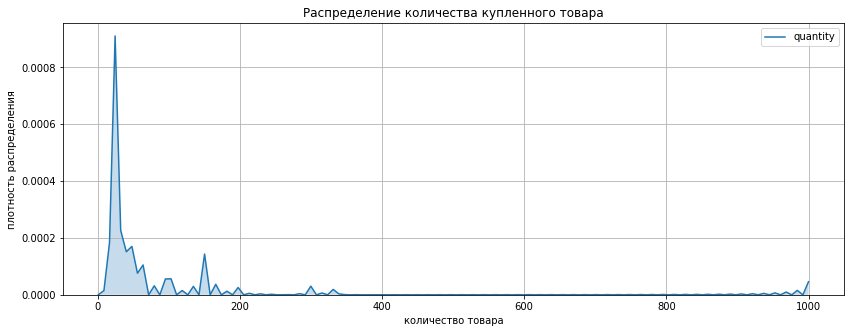

In [17]:
# Построим график распределения
kdeplot(ecommerce, 'quantity', 'количество товара', 'количества купленного товара')

Отметим, что основное число покупок приходится на количество товара до определённого значения. Свыше него имеются отдельные "выбросы". Изучим, что за товары продаются свыше 200 шт.

In [18]:
ecommerce.query('quantity > 200')['product'].unique()

array(['Муляж ЯБЛОКО 9 см красное',
       'Вешалки мягкие для деликатных вещей 3 шт шоколад',
       'Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000'],
      dtype=object)

Скорее всего, покупатель не станет покупать для личного пользования за раз более 200 шт. муляжей фрукта, вешалок или вантузов. Такиме покупки могут быть связаны с оптовыми или совместными закупками. И в том, и в другом случае, это говорит о сегменте B2B ("Business to business"), для которого следует рассматривать другой вид предложений от нашего магазина (например, систему скидок, но никак не персонализированный подход по товарам). Поскольку нас интересует сегмент B2C ("Business to customer"), исключим из анализа данные о покупках свыше 200 шт., и ещё раз изучим данные.

In [19]:
ecommerce_btoc = ecommerce.query('quantity <= 200')

In [20]:
# Изучим информацию о данных в столбце
ecommerce_btoc['quantity'].describe()

count    6734.000000
mean        2.260024
std         7.474256
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       200.000000
Name: quantity, dtype: float64

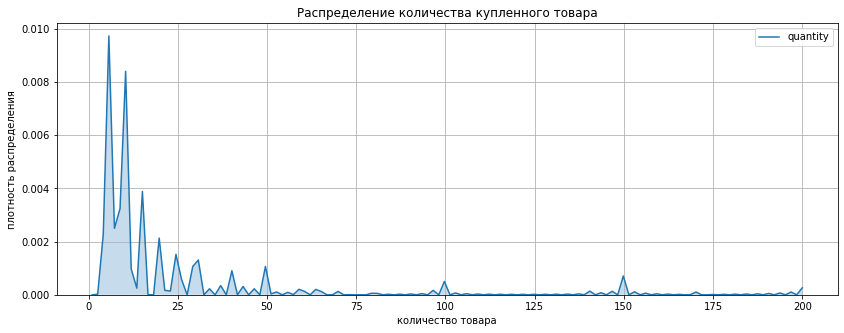

In [21]:
# Построим график распределения
kdeplot(ecommerce_btoc, 'quantity', 'количество товара', 'количества купленного товара')

Видим, что и показатели до 200 шт. имеют несколько "выбросов". Возможно, нам следует ещё больше снизить границу для сектора B2C. Изучим, какие товары покупают в количестве от 100 шт.

In [22]:
ecommerce_btoc.query('quantity > 100')['product'].unique()

array(['Крепеж для пружины дверной, 1107055',
       'Пружина дверная 240 мм оцинкованная (Д-19 мм) без крепления, 1107014',
       'Муляж ЯБЛОКО 9 см красное',
       'Ручка-скоба РС-100 белая *Трибатрон*, 1108035',
       'Плечики пластмассовые Размер 52 - 54 Тула 1205158'], dtype=object)

В основном, это фурнитура, муляжи фрукта и плечики. Скорее всего, это товары для частных магазинов или риелторских агентств (муляжи). Также исключим такие покупки из анализа.

In [23]:
ecommerce_btoc = ecommerce_btoc.query('quantity <= 100').reset_index(drop=True)

In [24]:
# Изучим информацию о данных в столбце
ecommerce_btoc['quantity'].describe()

count    6726.000000
mean        2.075379
std         5.181620
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       100.000000
Name: quantity, dtype: float64

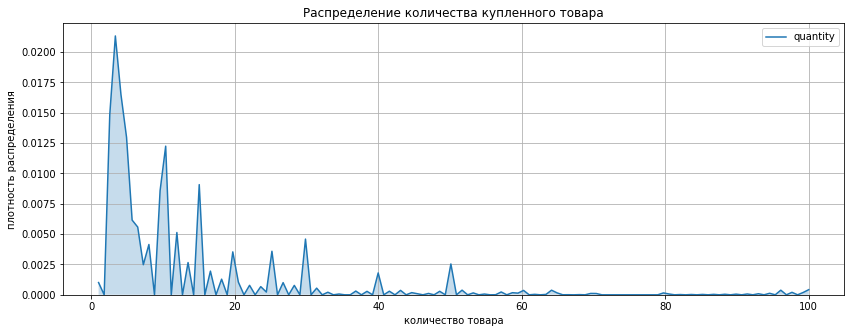

In [25]:
# Построим график распределения
kdeplot(ecommerce_btoc, 'quantity', 'количество товара', 'количества купленного товара')

В целом, можно предположить, что отдельные люди будут покупать какие-то товары в количестве 100 шт. для личного пользования. Например, если они делают ремонт в квартире, и необходима фурнитура; или это большая семья (3-5 человек), покупающая вешалки для личного пользования. Также сюда могут попасть и совместные закупки, но это тоже особый тип потребителя, нуждающийся в персональных рекомендациях.

#### Цена товара <a id='price'></a> и выручка

In [26]:
# Изучим информацию о данных в столбце
ecommerce_btoc['price'].describe()

count     6726.000000
mean       462.613589
std        871.856437
min          9.000000
25%        101.000000
50%        135.000000
75%        404.000000
max      14917.000000
Name: price, dtype: float64

Разброс по ценам товаров для отфильтрованных данных всё ещё достаточно большой (стандартное отклонение около 870 ден.ед.), и есть "всплески" (максимум составляет 14 917 ден.ед.). При этом большинство клиентов покупает товар в пределах до 400 ден.ед. (минимальная стоимость равна 9 ден.ед., первый квартиль - 101 ден.ед., медиана составляет 135 ден.ед., а третий квартиль - 404 ден.ед.). Средняя стоимость единицы купленного товара отличается от медианной, что связано с "всплесками" ("выбросами"), и составляет около 460 ден.ед.

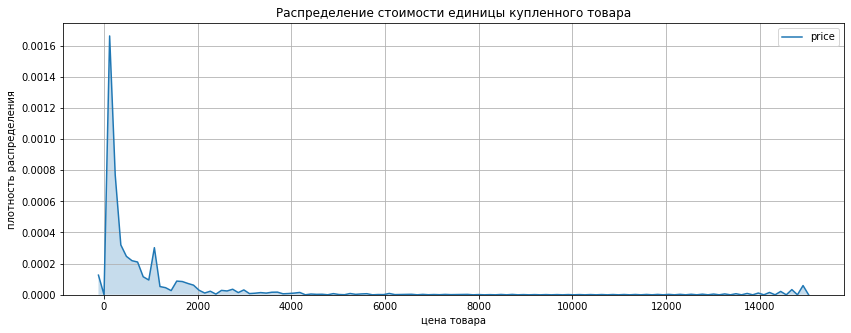

In [27]:
# Построим график распределения
kdeplot(ecommerce_btoc, 'price', 'цена товара', 'стоимости единицы купленного товара')

Отметим, что основное число покупок приходится на цену товара до определённого значения. Свыше него имеются отдельные "выбросы". То есть очень дорогой товар покупают не так часто и не так много, как дешёвый. Изучим, что за товары продаются за цену дороже 10 000 ден.ед.

In [28]:
ecommerce_btoc.query('price > 10000')['product'].unique()

array(['Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая'],
      dtype=object)

Учитывая, что нам неизвестно, в каких ден.ед. измеряется стоимость единицы товара, цена выглядит вполне вероятной.

Помимо показателей числа проданных товаров и стоимости за единицу, нам понадобится показатель выручки (суммарной стоимости покупки). Рассчитаем выручку (столбец `revenue`) как произведение количества товара (`quantity`) на его цену (`price`).

In [29]:
ecommerce_btoc['revenue'] = ecommerce_btoc['quantity'] * ecommerce_btoc['price']

In [30]:
# Изучим информацию о данных в столбце 'revenue'
ecommerce_btoc['revenue'].describe()

count     6726.000000
mean       604.923877
std       1355.113209
min          9.000000
25%        120.000000
50%        157.000000
75%        599.000000
max      47385.000000
Name: revenue, dtype: float64

Разброс по выручке за проданный товар достаточно большой (стандартное отклонение составило около 1 355 ден.ед.), и есть "всплески" (максимум составляет 47 385 ден.ед.). При этом большинство клиентов тратит на покупку до 600 ден.ед. (минимальная стоимость покупки равна 9 ден.ед., первый квартиль - 120 ден.ед., медиана составляет 157 ден.ед., а третий квартиль - 599 ден.ед.). Средняя стоимость покупки отличается от медианной, что связано с "всплесками" ("выбросами"), и составляет около 604 ден.ед.

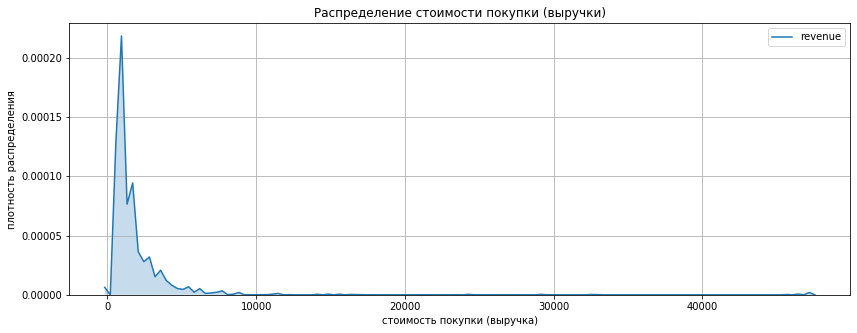

In [31]:
# Построим график распределения
kdeplot(ecommerce_btoc, 'revenue', 'стоимость покупки (выручка)', 'стоимости покупки (выручки)')

Несмотря на то, что наблюдаются редкие значения после определённой стоимости покупки, пока нам не следует исключать из анализа какие-либо покупки, так как это могут быть оправданные значения (например, совместные закупки).

Также проверим отсутствие неявных дубликатов: позиций, которые имеют разные даты, но повторяющиеся значения для остальных столбцов.

In [32]:
ecommerce_btoc.groupby(['customer_id', 'order_id', 'product']).count().sort_values('date', ascending=False).head()

date  \
customer_id                          order_id product                                                    
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    Рассада Огурец Фараон ячейки по 6 шт Е6               74   
                                              Рассада Кабачка сорт Горный, кассета по 6шт           74   
                                              Тагетис крупноцветковый рассада однолетних цвет...    74   
                                              Рассада Кабачка сорт Золотинка кассета 6 шт E6        74   
                                              Рассада Патиссона сорт НЛО Белый, кассета по 6шт      74   

                                                                                                  quantity  \
customer_id                          order_id product                                                        
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    Рассада Огурец Фараон ячейки по 6 шт Е6                   74   
                                              Рассада Кабачка сорт Горный, кассета по 6шт               74   
                                              Тагетис крупноцветковый рассада однолетних цвет...        74   
                                              Рассада Кабачка сорт Золотинка кассета 6 шт E6            74   
                                              Рассада Патиссона сорт НЛО Белый, кассета по 6шт          74   

                                                                                                  price  \
customer_id                          order_id product                                                     
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    Рассада Огурец Фараон ячейки по 6 шт Е6                74   
                                              Рассада Кабачка сорт Горный, кассета по 6шт            74   
                                              Тагетис крупноцветковый рассада однолетних цвет...     74   
                                              Рассада Кабачка сорт Золотинка кассета 6 шт E6         74   
                                              Рассада Патиссона сорт НЛО Белый, кассета по 6шт       74   

                                                                                                  revenue  
customer_id                          order_id product                                                      
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    Рассада Огурец Фараон ячейки по 6 шт Е6                  74  
                                              Рассада Кабачка сорт Горный, кассета по 6шт              74  
                                              Тагетис крупноцветковый рассада однолетних цвет...       74  
                                              Рассада Кабачка сорт Золотинка кассета 6 шт E6           74  
                                              Рассада Патиссона сорт НЛО Белый, кассета по 6шт         74

Видим, что некоторые заказы и товары повторяются для одних и тех же потребителей в разные даты. Скорее всего, это может быть связано с отслеживанием разных статусов заказов ("Создан", "Оплачено", "Доставлен"), которых нет в наших данных. Посчитаем число таких дубликатов, и удалим их.

In [33]:
len(ecommerce_btoc)

6726

In [34]:
ecommerce_btoc[['customer_id', 'order_id', 'product']].duplicated().sum()

1884

In [35]:
ecommerce_btoc = (ecommerce_btoc
                      .loc[ecommerce_btoc[['customer_id', 'order_id', 'product']].duplicated(keep='first') != True]
                      .reset_index(drop=True))

In [36]:
ecommerce_btoc[['customer_id', 'order_id', 'product']].duplicated(keep='first').sum()

0

Неявные дубликаты удалены из данных.

### Вывод <a id='step_1.6'></a>

У нас имеются **данные о 6 737 транзакциях в интернет-магазине** товаров для дома и быта «Пока все ещё тут» с информацией о дате заказа, идентификаторах покупателей и заказов, наименованиях купленных товаров, количестве товара в заказе и его цене.

Данные предоставлены за период **с 1 октября 2018 года по 31 октября 2019 года**, то есть за год и один месяц. В течение указанного периода **покупки в интернет-магазине производил 2 451 клиент**. При этом было **осуществлено 2 784 заказа**. В один заказ могли попасть разные товары. Кроме того, один пользователь мог сделать несколько заказов за анализируемый период. **Было продано 2 343 разных товара** (некоторые не в одном экземпляре). При этом наблюдаем абсолютную **разнородность товаров**: есть и семена, есть бытовые приспособления, есть и мебельные товары, и другие категории.

**Разброс в количестве купленного товара достаточно большой** (стандартное отклонение около 15 шт.), и есть "всплески" (максимум составляет 1 000 шт.). При этом большинство клиентов покупает товар в количестве 1 шт. (первый, второй и третий квартили равны 1). Среднее количество купленного товара отличается от медианного (1 шт.), что связано с "всплесками" ("выбросами"), и составляет около 2-3 шт. Поскольку, вероятнее всего, покупатель не станет покупать для личного пользования за раз более 100 шт. муляжей фрукта, вешалок, фурнитуры или вантузов, такие покупки могут быть связаны с оптовыми или совместными закупками в крупном размере. И в том, и в другом случае, это говорит о сегменте B2B ("Business to business"), для которого следует рассматривать другой вид предложений от нашего магазина (например, систему скидок, но никак не персонализированный подход по товарам). Поскольку нас интересует сегмент B2C ("Business to customer"), мы исключили из анализа данные о покупках свыше 100 шт.

**Разброс по ценам товаров** для отфильтрованных данных всё ещё оказался достаточно большим (стандартное отклонение около 870 ден.ед.), и есть "всплески" (максимум составляет 14 917 ден.ед.). При этом большинство клиентов покупает товар в пределах до 400 ден.ед. (минимальная стоимость равна 9 ден.ед., первый квартиль - 101 ден.ед., медиана составляет 135 ден.ед., а третий квартиль - 404 ден.ед.). Средняя стоимость единицы купленного товара отличается от медианной, что связано с "всплесками" ("выбросами"), и составляет около 460 ден.ед. Отметим, что основное число покупок приходится на цену товара до определённого значения. Свыше него имеются отдельные "выбросы". То есть очень дорогой товар покупают не так часто и не так много, как дешёвый. Но поскольку нам неизвестно, в каких ден.ед. измеряется стоимость единицы товара, было принято решение не отфильтровывать данные для анализа по цене товара.

Помимо показателей числа проданных товаров и стоимости за единицу, мы рассчитали показатель выручки (суммарной стоимости покупки) как произведение количества товара на его цену. **Разброс по выручке за проданный товар** тоже достаточно большой (стандартное отклонение составило около 1 355 ден.ед.), и есть "всплески" (максимум составляет 47 385 ден.ед.). При этом большинство клиентов тратит на покупку до 600 ден.ед. (минимальная стоимость покупки равна 9 ден.ед., первый квартиль - 120 ден.ед., медиана составляет 157 ден.ед., а третий квартиль - 599 ден.ед.). Средняя стоимость покупки отличается от медианной, что связано с "всплесками" ("выбросами"), и составляет около 604 ден.ед. Несмотря на то, что наблюдаются редкие значения после определённой стоимости покупки, пока нам не следует исключать из анализа какие-либо покупки, так как это могут быть оправданные значения (например, совместные закупки).

Данные готовы к анализу и обработке.

## Этап 2. Сегментирование пользователей по группам товаров <a id='step_2'></a>

### Лемматизация и создание групп <a id='step_2.1'></a>

Выделим леммы в значениях столбца с наименованием товара. Для этого определим список уникальных значений по столбцу `product`, создадим новый столбец для лемм и запустим цикл лемматизации, воспользовавшись библиотекой на русском языке — 'pymystem3'. Поскольку 'pymystem3' по умолчанию выдает только список лемматизированных слов, итоговый результат склеим вызовом метода join().

In [37]:
m = Mystem()
product_unique = ecommerce_btoc['product'].unique()
lemmas = []
for i in product_unique:
    result = ''.join(m.lemmatize(i)).strip()
    lemmas.append(result)
lemmas

['комнатный растение в горшок алый вера, d12, h30',
 'комнатный растение в горшок кофе арабика, d12, h25',
 'радермахер d-12 см h-20 см',
 'хризолидокарпус лутесценс d-9 см',
 'циперус зумула d-12 см h-25 см',
 'шеффлер лузеан d-9 см',
 'юкка нитчатый d-12 см h-25-35 см',
 'настенный сушилка для белье Gimi Brio Super 100',
 'таз пластмассовый 21,0 л круглый "водолей" С614, 1404056',
 'чехол для гладильный доска Colombo Persia Beige 130х50 см из хлопок 5379',
 'вешалка для брюки металлический с резиновый покрытие 26 см цвет: синий, Attribute, AHS331',
 'сушилка для белье потолочный Zalger Lift Basic 1520 200 см, 10 м',
 'чехол Eurogold Clean Basic хлопок для доска 120х38-120х42 см C42',
 'крючок одежный 2-х рожковый серый металлик с полимерный покрытие *тонар*, 1110027',
 'корзина мягкий пластиковый 17 л, м-пластика, M2880',
 'мини-сковорода Marmiton "сердце" с антипригарный покрытие 12 см, LG17085',
 'сковорода алюминиевый с антипригарный покрытие MARBLE ALPENKOK d = 26 см AK-0039A/26N

Заметим, что в списке фигурируют схожие слова, но в Датафрейме они определяются как разные товары. Для выделения наиболее популярных направлений воспользуемся контейнером Counter из модуля 'collections'.

In [38]:
text = m.lemmatize(' '.join(lemmas))
Counter(text)

Counter({'комнатный': 26,
         ' ': 17697,
         'растение': 31,
         'в': 274,
         'горшок': 130,
         'алый': 3,
         'вера': 2,
         ', ': 1065,
         'd12': 3,
         'h30': 6,
         'кофе': 6,
         'арабика': 5,
         'h25': 1,
         'радермахер': 1,
         'd': 252,
         '-': 977,
         '12': 148,
         'см': 1062,
         'h': 61,
         '20': 73,
         'хризолидокарпус': 1,
         'лутесценс': 1,
         '9': 123,
         'циперус': 1,
         'зумул': 1,
         '25': 44,
         'шеффлер': 2,
         'лузеан': 1,
         'юкка': 1,
         'нитчатый': 1,
         '35': 8,
         'настенный': 30,
         'сушилка': 120,
         'для': 547,
         'белье': 144,
         'Gimi': 61,
         'Brio': 4,
         'Super': 7,
         '100': 57,
         'таз': 35,
         'пластмассовый': 59,
         '21': 20,
         ',': 295,
         '0': 164,
         'л': 253,
         'круглый': 23,
         '

Чтобы привести столбец в удобный для работы вид, определим на основе полученного списка категории товара для каждой строки из следующих (приведены наиболее часто встречающиеся уникальные леммы):

- товары для дачи: это рассада, уличные урны, черенки, тележки, семена и т.д.;
- товары для дома: это комнатные растения, гладильные доски, вешалки, ванные принадлежности, полотенца и т.д.;
- кухонные товары: это посуда, губки, скатерти;
- товары для строительства и ремонта: это полки, фурнитурные принадлежности, стремянки.

Для того, чтобы обработать данные в столбце с наименованиями товаров, создадим вспомогательный столбец с леммами для каждой строки столбца `product`.

In [39]:
product_lem = []
for i in ecommerce_btoc['product']:
    result = ''.join(m.lemmatize(i)).strip()
    product_lem.append(result)
ecommerce_btoc['product_lem'] = product_lem

In [40]:
ecommerce_btoc.head()

,date,customer_id,order_id,product,quantity,price,revenue,product_lem
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,"комнатный растение в горшок алый вера, d12, h30"
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,"комнатный растение в горшок кофе арабика, d12,..."
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,радермахер d-12 см h-20 см
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,хризолидокарпус лутесценс d-9 см
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,циперус зумула d-12 см h-25 см


Создадим списки категорий. Добавим в них ключевые слова, которые будут указывать на ту или иную категорию товара.

In [41]:
dacha = ['автополив', 'аквилегия', 'алиссум', 'анемон', 'антуриум', 'арбуз', 'астра', 'бадан', 'бакоп', 'барвинок', 'бегония',
         'бензин', 'бузульник', 'веник', 'вербейник', 'вербена', 'веревка', 'виола', 'г', 'гайлардий', 'гвоздик', 'георгин',
         'гипсофил', 'гортензия', 'девичий', 'дендробиум', 'дыня', 'ель', 'зола', 'календула', 'калибрахоа', 'камнеломка',
         'кассета', 'кашпо', 'кипарисовик', 'клен', 'клубника', 'колокольчик', 'колосковый', 'кореопсис', 'корыто', 'косметь',
         'котовник', 'лапчатка', 'лен', 'лилейник', 'лобелия', 'многолетний', 'монарда', 'мусор', 'мусорный', 'настурция',
         'нивянник', 'осина', 'папоротник', 'пеларгония', 'петуния', 'пикник', 'пиретрум', 'платикодон', 'почтовый',
         'пьезозажигалка', 'ранункулус', 'рассада', 'роза', 'рудбекия', 'садовый', 'седум', 'солидаго', 'сумка-тележка',
         'тележка', 'томат', 'тюльпан', 'уличный', 'урна', 'урна-пепельница', 'фал', 'физостегия', 'флокс', 'фуксия', 'хоста',
         'хозяйственный', 'хризантема', 'цинния', 'черенок', 'шнур', 'шпагат', 'щетка-сметка', 'энотера', 'эхинацея', 'ясколка']

household_goods = ['d-', 'd-5', 'd-7', 'd-9', 'D10', 'd-10', 'd-11', 'D12', 'D12,', 'd12', 'd-12', 'd-13', 'd-14', 'd-15',
                  'd-17', 'd-18', 'd-19', 'd-20', 'd-21', 'D23', 'd-23', 'бак', 'ванна', 'ванная', 'ванный', 'вантуз', 'ваза',
                  'ведро', 'весы', 'вешалка', 'вешалка-перекладина', 'вешалка-плечики', 'вешалка-стойка', 'вешалка-сушилка',
                  'вещь', 'гладильный', 'глажение', 'засор', 'зубной', 'известковый', 'искусственный', 'искуственный', 'калла',
                  'ключница', 'ковер', 'коврик', 'ковш', 'комнатный', 'кондиционер', 'корзина', 'коробка', 'кофр', 'крючок',
                  'лавр', 'лоток', 'мыло', 'мыло-скраб', 'муляж', 'наволочка', 'наматрацник', 'наматрицник-чехол',
                  'наматрасник', 'насадка', 'насадка-моп', 'одеяло', 'окномойка', 'отбеливатель', 'перчатка', 'плед', 'плечики',
                  'подголовник', 'пододеяльник', 'подрукавник', 'подушка', 'покрывало', 'пол', 'полимербыт', 'полировка',
                  'полотенце', 'постельный', 'прищепок', 'простыня', 'пыль', 'пятно', 'радиаторный', 'ролик', 'салфетка',
                  'сантехника', 'светильник', 'скребок', 'совок', 'стиральный', 'стирка', 'сушилка', 'таз', 'ткань', 'тряпка',
                  'тряпкодержатель', 'туалет', 'туалетный', 'увлажнять', 'унитаз', 'унитазный', 'утюг', 'фен', 'фоторамка',
                  'халат', 'хранение', 'цикламен,', 'чехол', 'швабра', 'щетка', 'щетка-утюжок', 'шило', 'штора']

kitchen_goods = ['антижир', 'банка', 'бидон', 'блюдо', 'блюдце', 'бокал', 'бульонница', 'бутылка', 'бутылочный', 'венчик',
                 'вилка', 'выпечка', 'герметичный', 'губка', 'измельчитель', 'картофелемялка', 'кастрюля', 'кекс',
                 'кипятильник', 'кондитерский', 'кружка', 'крышка', 'кухонный', 'лопатка', 'ложка', 'мантоварка',
                 'мантоварка-пароварка', 'миксер', 'мини-сковорода', 'миска', 'мука', 'нож', 'ножеточка', 'овощеварка',
                 'овощечистка', 'овсянница', 'орехоколка', 'отделитель', 'плита', 'половник', 'посуда', 'посудомоечный',
                 'пресс', 'продукт', 'противень', 'разделочный', 'рыбочистка', 'салатник', 'салфетница', 'сахарница', 'свч',
                 'сито', 'скалка', 'скатерть', 'сковорода', 'соковарка', 'соковыжималка', 'сотейник', 'стакан', 'столовый',
                 'тарелка', 'терка', 'термокружок', 'термос', 'термостакан', 'толкушка', 'тортница', 'фужер', 'хлебница',
                 'чайник', 'чайный', 'электроштопор', 'яйцо']

furniture = ['болт', 'вентиляционный', 'инструмент', 'карниз', 'комод', 'крепеж', 'лестница-стремянка', 'линейка', 'линейка,',
             'мебельный', 'напильник', 'обувница-3', 'петля', 'петля-стрела', 'подставка', 'полк', 'полка', 'пробка', 'пуф',
             'сварка', 'сверло', 'сверло-фреза,', 'свереть', 'стеллаж', 'стремянка', 'стремянка-табурет', 'строительный',
             'уголок', 'угольник', 'угольник,', 'фиксатор-шар', 'форточный', 'шпингалет', 'штангенциркуль', 'этажерка']

По ключевым словам определим категории в словаре.

In [42]:
def classify_product(product_lem):
    for item in kitchen_goods:
        if item in product_lem:
            return 'кухонные товары'
    for item in household_goods:
        if item in product_lem:
            return 'товары для дома'
    for item in dacha:
        if item in product_lem:
            return 'товары для дачи'
    for item in furniture:
        if item in product_lem:
            return 'товары для строительства и ремонта, мебель'
    return 'нет данных о категории'

In [43]:
ecommerce_btoc['product_categ'] = ecommerce_btoc['product_lem'].apply(classify_product)

In [44]:
len(ecommerce_btoc.query('product_categ == "нет данных о категории"'))

0

Товаров, которым не присвоена категория, не осталось. Удалим столбец с лемматизацией - он нам больше не понадобится.

In [45]:
ecommerce_btoc = ecommerce_btoc.drop('product_lem', axis=1)
ecommerce_btoc.head()

,date,customer_id,order_id,product,quantity,price,revenue,product_categ
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,товары для дома
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,товары для дома
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,товары для дома
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,товары для дома
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,товары для дома


### Кумулятивная выручка по группам <a id='step_2.2'></a>

Для анализа кумулятивных показателей сгруппируем данные и соберём необходимые кумулятивные значения. Напишем для этого функцию.

In [46]:
def df_cum(df, factor):
    
    # где df - данные, которые будем структурировать; factor - фактор дальнейшей группировки
    
    # Создадим массив уникальных пар значений дат и групп для покупок
    dates_groups = df[['date', factor]].drop_duplicates()
    
    # Соберём агрегированные кумулятивные данные о заказах и покупателях по дням
    product_factor_agg = dates_groups.apply(lambda x: df[np.logical_and(df['date'] <= x['date'], df[factor] == x[factor])]
                                            .agg({'date': 'max', factor: 'max', 'order_id': pd.Series.nunique,
                                                  'customer_id': pd.Series.nunique, 'revenue': 'sum'}),
                                            axis=1).sort_values(by=['date', factor])
    
    # Соберём агрегированные кумулятивные данные о товарах по дням
    customers_agg = dates_groups.apply(lambda x: df[np.logical_and(df['date'] <= x['date'], df[factor] == x[factor])]
                                       .agg({'date': 'max', factor: 'max', 'quantity': 'sum'}),
                                       axis=1).sort_values(by=['date', factor])
    
    # Объединим кумулятивные данные в одной таблице и переименуем столбцы
    result = product_factor_agg.merge(customers_agg, on=['date', factor])
    result.columns = ['date', factor, 'orders', 'customers', 'revenue', 'quantity']
    return result

In [47]:
ecommerce_cum = df_cum(ecommerce_btoc, 'product_categ')

Запишем функцию построения графика, сравнивающего показатели для разных товарных групп, и построим график.

In [48]:
# Функция построения сравнительного графика
def plot_dif_groups(df, column, factor, date, title, factor_name, ylabel):
    
    # где df - это Датасет; column - название столбца с данными; factor - фактор группировки; date - столбец с датами; 
    # ylabel - подпись оси Y (показатель); title - показатель в названии графика (с заглавной буквы);
    # factor_name - название фактора группировки (в Родительном падеже)

    fig, ax = plt.subplots(figsize=(10,4))
    ax.set(title=title+' по группам '+factor_name, xlabel='дата', ylabel=ylabel)
    for category in df[factor].unique():
        df_categ = df[df[factor] == category]
        ax.plot(df_categ[date], df_categ[column], '-', label=category)
    xlabels = ax.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ax.grid()
    ax.legend(bbox_to_anchor=(1.52, 1))
    plt.show()

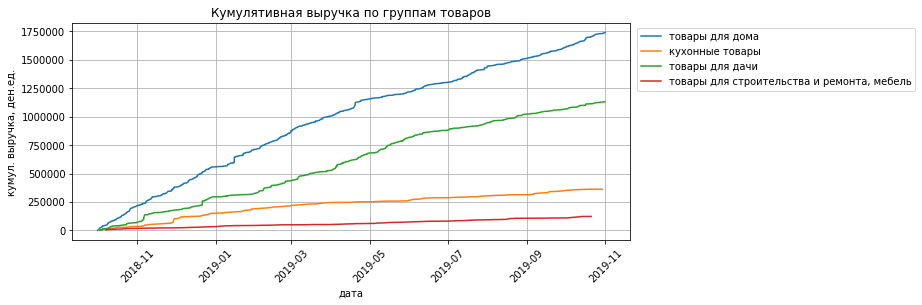

In [49]:
plot_dif_groups(ecommerce_cum, 'revenue', 'product_categ', 'date', 'Кумулятивная выручка', 'товаров', 'кумул. выручка, ден.ед.')

По кумулятивной выручке самым прибыльным направлением для бизнеса являются товары для дома, чуть меньшую доходность имеют товары для дачи. Отличие между этими категориями заключается в том, что продажа товаров для дачи имеет сезонный характер (с мая доходность этой категории приблизилась к доходности категории товары для дома). Меньшей доходностью обладают две другие категории: чуть более прибыльны кухонные товары; и самым недоходным направлением по кумулятивной выручке являются товары для строительства и ремонта, мебель.

### Кумулятивный средний чек по группам <a id='step_2.3'></a>

Для того, чтобы изучить динамику среднего чека по группам, необходимо разделить кумулятивную выручку на кумулятивное количество.

In [50]:
ecommerce_cum['avg_price'] = ecommerce_cum['revenue'] / ecommerce_cum['quantity']

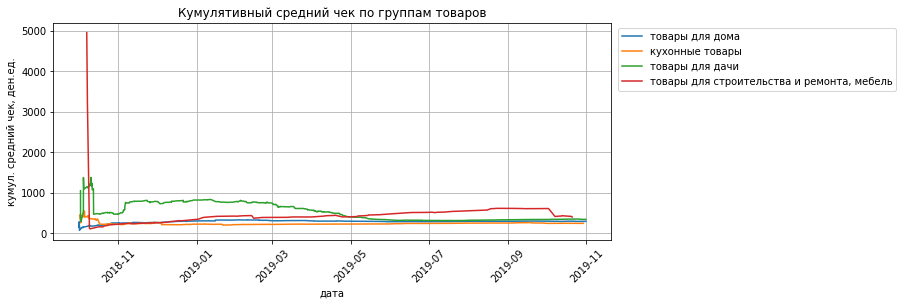

In [51]:
# Построим график
plot_dif_groups(ecommerce_cum, 'avg_price', 'product_categ', 'date', 'Кумулятивный средний чек', 'товаров',
                'кумул. средний чек, ден.ед.')

В октябре 2018 года наблюдалась очень крупная по стоимости покупка в категории товаров для строительства и ремонта, мебели. В целом, данная категория с апреля 2019 года превосходила по среднему чеку другие категории. Товары для дачи по кумулятивному среднему чеку предвосходили другие категории до мая 2019 года, что может быть связано с сезонностью: падение числа купленных товаров в категории при относительной неизменности их цен - соответственно, цена каждого купленного товара относительно выше. С мая 2019 года все категории, кроме товаров для строительства и ремонта, мебели, установились возле близких отметок.

Чтобы увидить различия между ними, построем более укрупнённый график без учёта "выбросов" в начале периода.

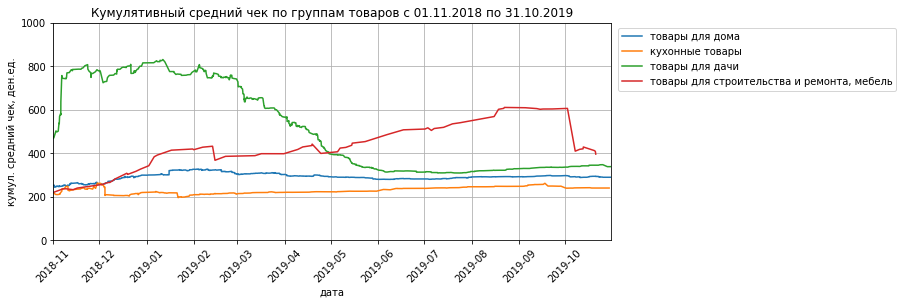

In [52]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set(title='Кумулятивный средний чек по группам товаров c 01.11.2018 по 31.10.2019', xlabel='дата',
       ylabel='кумул. средний чек, ден.ед.')
for category in ecommerce_cum['product_categ'].unique():
    df_categ = ecommerce_cum.query('product_categ == @category')
    ax.plot(df_categ['date'], df_categ['avg_price'], '-', label=category)
xlabels = ax.xaxis.get_ticklabels()
for label in xlabels:
    label.set_rotation(45)
ax.grid()
ax.legend(bbox_to_anchor=(1.52, 1))
ax.axis([pd.to_datetime("2018-11-01"), pd.to_datetime('2019-10-31'), 0, 1000])
plt.show()

Средний чек товаров для дома и кухонных товаров практически не менялся на протяжении всего периода: товары для дома, в среднем, стоили дороже, чем товары для кухни. Товары для строительства по кумулятивному среднему чеку с ноября 2018 по декабрь 2018 года установился на уровне кухонных товаров, потом начал расти, и достиг пикового значения в августе-сентябре 2019 года, затем начал снижаться с сентября 2019 года. Товары для дачи показывали очень высокий средний чек (около 800 ден.ед.) до марта 2019 года, затем снизился и установился на уровне 200-300 ден.ед. с июня 2019 года.

Исключим из дальнейшего анализа обнаруженный "выброс" в октябре 2018 года - тем более, для анализа нам достаточно данных за полный год.

In [53]:
ecommerce_btoc = ecommerce_btoc.query('date>="2018-11-01"')
ecommerce_cum = ecommerce_cum.query('date>="2018-11-01"')

### Распределение количества заказов по пользователям в товарных группах <a id='step_2.4'></a>

Определим, имеются ли в нашем магазине пользователи, приверженные в большей степени какой-то категории и делающие большое число заказов в интернет-магазине.

In [54]:
# Создадим таблицу с количеством заказов по пользователям
orders_by_customers = (ecommerce_btoc
                           .drop(['date', 'product', 'quantity', 'price'], axis=1)
                           .groupby(['product_categ', 'customer_id'], as_index=False)
                           .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
                           .reset_index()
                      )

# Переименуем колонки
orders_by_customers.columns = ['id', 'product_categ', 'customer_id', 'orders', 'revenue']

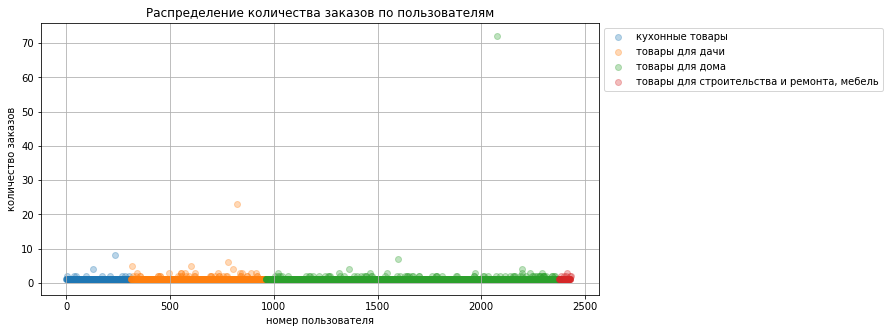

In [55]:
# Построим график
fig, ax = plt.subplots(figsize=(10,5))
ax.set(title='Распределение количества заказов по пользователям', xlabel='номер пользователя', ylabel='количество заказов')
for category in orders_by_customers['product_categ'].unique():
    df_filtered = orders_by_customers.query('product_categ == @category')
    ax.scatter(df_filtered['id'], df_filtered['orders'], alpha = 0.3, label=category)
ax.legend(bbox_to_anchor=(1, 1))
ax.grid()
plt.show()

Большинство покупателей заказывали до 10 раз. Однако у нас есть пользователи, которые покупали товары для дома более 70 раз, и товары для дачи более 20 раз. Немного масштабируем график, отобразив до 10 заказов, чтобы выявить ещё некоторое количество аномалий.

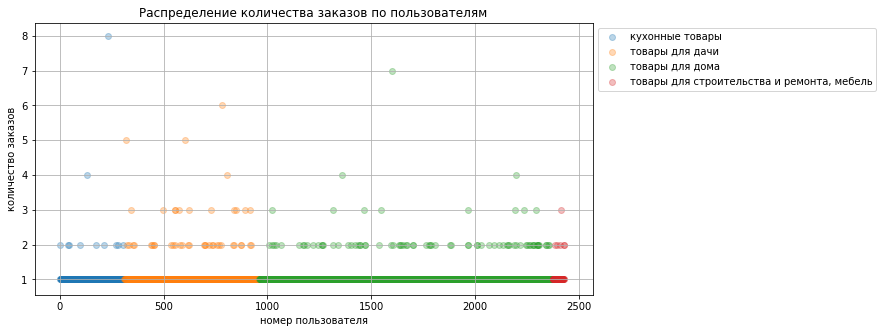

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set(title='Распределение количества заказов по пользователям', xlabel='номер пользователя', ylabel='количество заказов')
for category in orders_by_customers.query('orders <= 10')['product_categ'].unique():
    df_filtered = orders_by_customers.query('orders <= 10 & product_categ == @category')
    ax.scatter(df_filtered['id'], df_filtered['orders'], alpha = 0.3, label=category)
ax.legend(bbox_to_anchor=(1, 1))
ax.grid()
plt.show()

Очевидно, имеются "выбросы" свыше 2-3 покупок. Поскольку точная доля пользователей с заказами до 2-3 раз неизветна, мы пока не можем утверждать, какие из значений являются аномалиями.

Напомним, что эти значения могут повлиять на конечный результат. И в дальнейшим - для проведения статистических сравнений - нам лучше исключить аномальных пользователей. Для определения границы, отсекающей аномальных пользователей, посчитаем 90-й, 95-й и 99-й перцентили количества заказов на пользователя.

In [57]:
# Функция определения 90-го, 95-го и 99-го перцентилей
def percentile(df, column):
    perc90 = np.percentile(df[column], 90)
    perc95 = np.percentile(df[column], 95)
    perc99 = np.percentile(df[column], 99)
    print('90-й, 95-й и 99-й перцентили равны, соответственно, {:.1f}, {:.1f}, {:.1f}.'.format(perc90, perc95, perc99))

In [58]:
print('Показатели количества заказов на пользователя:')
percentile(orders_by_customers, 'orders')

Показатели количества заказов на пользователя:
90-й, 95-й и 99-й перцентили равны, соответственно, 1.0, 2.0, 3.0.


Не более 1% пользователей оформляли 3 и более заказов; не более 5% - 2 и более заказов. И 10% пользователей заказывали более 1 раза.

Таким образом, свыше 2 (3 заказа) - это нижняя граница аномального числа заказов. Именно по ней в дальнейшем будем "очищать" данные.

### Распределение стоимостей покупок в товарных группах <a id='step_2.5'></a>

Ранее при анализе выручки мы обратили внимание на то, что в отдельные даты по некоторым товарным группам имеются измнения темпа роста кумулятивного показателя. Они могут быть связаны как с сезонностью, так и с аномалиями. Изучим более подробно распределение стоимостей покупок (заказов).

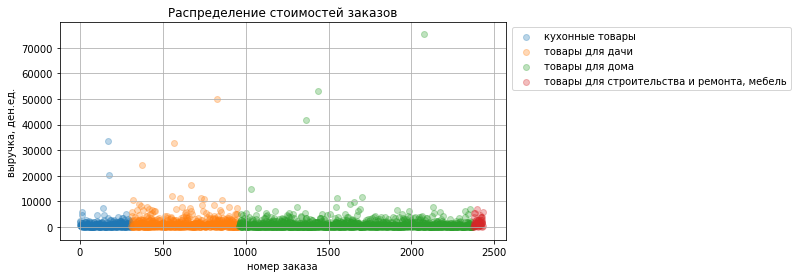

In [59]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set(title='Распределение стоимостей заказов', xlabel='номер заказа', ylabel='выручка, ден.ед.')
for category in orders_by_customers['product_categ'].unique():
    df_filtered = orders_by_customers.query('product_categ == @category')
    ax.scatter(df_filtered['id'], df_filtered['revenue'], alpha = 0.3, label=category)
ax.legend(bbox_to_anchor=(1.65, 1))
ax.grid()
plt.show()

Действительно имеется несколько аномально дорогих заказа (свыше 20 000 ден.ед.). Немного масштабируем график, отобразив заказы до 20 000 ден.ед., чтобы выявить ещё некоторое количество аномалий.

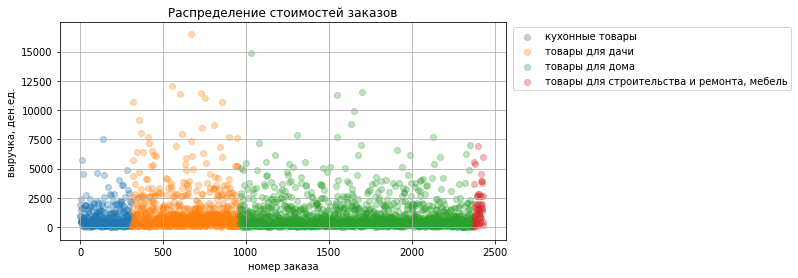

In [60]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set(title='Распределение стоимостей заказов', xlabel='номер заказа', ylabel='выручка, ден.ед.')
for category in orders_by_customers[orders_by_customers['revenue'] < 20000]['product_categ'].unique():
    df_filtered = orders_by_customers[orders_by_customers['revenue'] < 20000].query('product_categ == @category')
    ax.scatter(df_filtered['id'], df_filtered['revenue'], alpha = 0.3, label=category)
ax.legend(bbox_to_anchor=(1.65, 1))
ax.grid()
plt.show()

По укрупнённому графику заказов до 20 000 ден.ед. видим несколько аномальных значений свыше 7 500 - 10 000 ден.ед. Однако, как и в случае с заказами на пользователя, выручка также требует расчёта границы аномальных значений.

Для определения границы, отсекающей аномальные заказы по стоимости, посчитаем 90-й, 95-й и 99-й перцентили стоимостей заказов.

In [61]:
print('Показатели стоимостей заказов:')
percentile(orders_by_customers, 'revenue')

Показатели стоимостей заказов:
90-й, 95-й и 99-й перцентили равны, соответственно, 2699.0, 3852.5, 7926.0.


Не более 1% заказов дороже 7 926 ден.ед.; не более 5% - дороже 3 852 ден.ед. И 10% заказов было совершено на сумму свыше 2 699 ден.ед.

Таким образом, свыше 8 000 ден.ед. - это нижняя граница аномальной стоимости заказов. Именно по ней в дальнейшем будем "очищать" данные.

### Cтатистическая значимость различий в показателях <a id='step_2.6'></a>

Чтобы рассчитать статистическую значимость различий в показателях между сегментами, применим критерий Манна-Уитни. И рассчитаем относительные различия между различными группами.

Результат отобразим в виде таблицы.

In [62]:
def test_values(df, column):
    
    # где df - датасет, в котором находится нужный показатель; column - столбец с показателям, по которому производим тест
    
    # Расчитаем p-value
    kitchen_dacha_pvalue = st.mannwhitneyu(df.query('product_categ == "кухонные товары"')[column],
                                           df.query('product_categ == "товары для дачи"')[column])[1]
    kitchen_household_pvalue = st.mannwhitneyu(df.query('product_categ == "кухонные товары"')[column],
                                               df.query('product_categ == "товары для дома"')[column])[1]
    kitchen_furniture_pvalue = st.mannwhitneyu(df.query('product_categ == "кухонные товары"')[column],
                                               df.query('product_categ == "товары для строительства и ремонта, мебель"')
                                               [column])[1]
    dacha_household_pvalue = st.mannwhitneyu(df.query('product_categ == "товары для дачи"')[column],
                                             df.query('product_categ == "товары для дома"')[column])[1]
    dacha_furniture_pvalue = st.mannwhitneyu(df.query('product_categ == "товары для дачи"')[column],
                                             df.query('product_categ == "товары для строительства и ремонта, мебель"')
                                             [column])[1]
    household_furniture_pvalue = st.mannwhitneyu(df.query('product_categ == "товары для дома"')[column],
                                                 df.query('product_categ == "товары для строительства и ремонта, мебель"')
                                                 [column])[1]
    
    # Расчитаем относительный прирост среднего чека
    kitchen_dacha_delta = (df.query('product_categ == "кухонные товары"')[column].mean() /
                           df.query('product_categ == "товары для дачи"')[column].mean()) - 1
    kitchen_household_delta = (df.query('product_categ == "кухонные товары"')[column].mean() /
                               df.query('product_categ == "товары для дома"')[column].mean()) - 1
    kitchen_furniture_delta = (df.query('product_categ == "кухонные товары"')[column].mean() /
                               df.query('product_categ == "товары для строительства и ремонта, мебель"')[column].mean()) - 1
    dacha_household_delta = (df.query('product_categ == "товары для дачи"')[column].mean() /
                             df.query('product_categ == "товары для дома"')[column].mean()) - 1
    dacha_furniture_delta = (df.query('product_categ == "товары для дачи"')[column].mean() /
                             df.query('product_categ == "товары для строительства и ремонта, мебель"')[column].mean()) - 1
    household_furniture_delta = (df.query('product_categ == "товары для дома"')[column].mean() /
                                 df.query('product_categ == "товары для строительства и ремонта, мебель"')[column].mean()) - 1
    
    # Построение сводной таблицы с показателями попарных тестов
    test_values = pd.DataFrame({'groups_tested': ['Кухонные товары и Товары для дачи', 'Кухонные товары и Товары для дома',
                                                  'Кухонные товары и Товары для строительства и ремонта, мебель', 'Товары для \
                                                  дачи и Товары для дома', 'Товары для дачи и Товары для строительства и \
                                                  ремонта, мебель', 'Товары для дома и Товары для строительства и ремонта, \
                                                  мебель'],
                                'p-value': [kitchen_dacha_pvalue, kitchen_household_pvalue, kitchen_furniture_pvalue,
                                            dacha_household_pvalue, dacha_furniture_pvalue, household_furniture_pvalue],
                                'delta': [kitchen_dacha_delta, kitchen_household_delta, kitchen_furniture_delta,
                                          dacha_household_delta, dacha_furniture_delta, household_furniture_delta]})
    test_values[['p-value', 'delta']] = round(test_values[['p-value', 'delta']], 5)
    test_values = test_values.set_index('groups_tested')
    return test_values

#### Cтатистическая значимость различий в среднем чеке заказа. "Сырые" данные

Построим гипотезу H0: Для различных товарных групп, попадающих в покупки клиентов, средний чек не отличается от аналогичного показателя для других товарных групп. Тогда гипотеза H1: Между показателями наблюдаются существенные различия.

In [63]:
test_values(ecommerce_cum, 'avg_price')

,p-value,delta
groups_tested,,
Кухонные товары и Товары для дачи,0.00000,-0.54446
Кухонные товары и Товары для дома,0.00000,-0.22512
"Кухонные товары и Товары для строительства и ремонта, мебель",0.00000,-0.47014
Товары для дачи и Товары для дома,0.00000,0.70102
"Товары для дачи и Товары для строительства и ремонта, мебель",0.05383,0.16315
"Товары для дома и Товары для строительства и ремонта, мебель",0.00000,-0.31621


Значение p-value для среднего чека при комбинациях сравнений разных товарных групп близок к нулю, кроме значения p-value для Товаров для дачи и Товаров для строительства и ремонта, мебель (p-value равен 0,054, что выше 0,05). А, значит, мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке есть различия для разных товарных групп, кроме Товаров для дачи и Товаров для строительства и ремонта, мебель.

Относительный прирост среднего чека группы Кухонные товары к показателю группы Товары для дачи составил -54,4%; группы Кухонные товары к показателю группы Товары для дома -22,5%; группы Кухонные товары к показателю группы Товары для строительства и ремонта, мебель -47%; группы Товары для дачи к показателю группы Товары для дома 70,1%; группы Товары для дачи к показателю группы Товары для строительства и ремонта, мебель -16,3% (статистически незначимое различие); группы Товары для дома к показателю группы Товары для строительства и ремонта, мебель -31,6%. Это значимые различия, кроме двух указанных выше категорий.

#### Cтатистическая значимость различий в выручке с заказа. "Сырые" данные

Построим гипотезу H0: Для различных товарных групп, попадающих в покупки клиентов, выручка магазина не отличается от аналогичного показателя для других товарных групп. Тогда гипотеза H1: Между показателями наблюдаются существенные различия.

In [64]:
test_values(ecommerce_btoc, 'revenue')

,p-value,delta
groups_tested,,
Кухонные товары и Товары для дачи,0.00000,0.64828
Кухонные товары и Товары для дома,0.00039,0.09492
"Кухонные товары и Товары для строительства и ремонта, мебель",0.00000,-0.46176
Товары для дачи и Товары для дома,0.00000,-0.33572
"Товары для дачи и Товары для строительства и ремонта, мебель",0.00000,-0.67345
"Товары для дома и Товары для строительства и ремонта, мебель",0.00000,-0.50842


Значение p-value для выручки от покупки при комбинациях сравнений разных товарных групп близко к нулю по всем категориям, кроме Кухонных товаров и Товаров для дома.  Для Кухонных товаров и Товаров для дома p-value составил 0,0004, что всё ещё ниже 0,05. А, значит, мы можем отвергнуть нулевую гипотезу и считать, что в выручке есть различия для разных товарных групп. Относительный прирост выручки группы Кухонные товары к показателю группы Товары для дачи составил 64,8%; группы Кухонные товары к показателю группы Товары для дома 9,5%; группы Кухонные товары к показателю группы Товары для строительства и ремонта, мебель -46,2%; группы Товары для дачи к показателю группы Товары для дома -33,6%; группы Товары для дачи к показателю группы Товары для строительства и ремонта, мебель -67,3%; группы Товары для дома к показателю группы Товары для строительства и ремонта, мебель -50,8%. Это значимые различия.

#### Cтатистическая значимость различий в среднем чеке заказа. "Очищенные" данные

Вспомним, что на предыдущих этапах мы приняли за аномальных пользователей тех, кто совершил более 3 заказов или совершил заказ за 10 000 ден.ед. и более. Исключив аномальные значения, мы уберём от 1 до 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

Узнаем, сколько всего аномальных пользователей было в интернет-магазине.

In [65]:
# Срезы данных для аномальных пользователей
customers_many_orders = orders_by_customers.query('orders > 3')['customer_id']
customers_expens_orders = orders_by_customers.query('revenue >= 8000')['customer_id']

# Число аномальных пользователей
anomal_visitors = pd.concat([customers_many_orders, customers_expens_orders], axis = 0).drop_duplicates().sort_values()
len(anomal_visitors)

27

Получили 27 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем чеке между товарными группами по очищенным данным. Гипотезы те же, что и для "сырых" данных.

Нам нужно построить кумулятивную таблицу по очищенным данным.

In [66]:
ecommerce_btoc_filt = ecommerce_btoc[np.logical_not(ecommerce_btoc['customer_id'].isin(anomal_visitors))]
ecommerce_cum_filt = df_cum(ecommerce_btoc_filt, 'product_categ')
ecommerce_cum_filt['avg_price'] = ecommerce_cum_filt['revenue'] / ecommerce_cum_filt['quantity']

In [67]:
test_values(ecommerce_cum_filt, 'avg_price')

,p-value,delta
groups_tested,,
Кухонные товары и Товары для дачи,0.0,-0.57143
Кухонные товары и Товары для дома,0.0,-0.25045
"Кухонные товары и Товары для строительства и ремонта, мебель",0.0,-0.76140
Товары для дачи и Товары для дома,0.0,0.74897
"Товары для дачи и Товары для строительства и ремонта, мебель",0.0,-0.44326
"Товары для дома и Товары для строительства и ремонта, мебель",0.0,-0.68167


Статистический анализ различий в среднем чеке по "очищенным" данным показал другой результат для категорий Товары для дачи и Товары для строительства и ремонта, мебель: p-value оказался близок к нулю, также как и значение p-value для среднего чека при комбинациях сравнений остальных товарных групп. А, значит, мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке есть различия для всех товарных групп.

Относительный прирост среднего чека группы Кухонные товары к показателю группы Товары для дачи составил -57,1% (по "сырым" данным показатель был по модулю чуть ниже); группы Кухонные товары к показателю группы Товары для дома -25% (по "сырым" данным показатель был по модулю чуть ниже); группы Кухонные товары к показателю группы Товары для строительства и ремонта, мебель -76,1% (ещё больше, чем для "сырых" данных); группы Товары для дачи к показателю группы Товары для дома 74,9% (немного выше значения по "сырым" данным); группы Товары для дачи к показателю группы Товары для строительства и ремонта, мебель -44,3% (для "сырых" данных была положительная, но статистически незначимая величина); группы Товары для дома к показателю группы Товары для строительства и ремонта, мебель -68,2% (для "сырых" данных значение по модулю было в два раза меньше). Это значимые различия.

#### Cтатистическая значимость различий в выручке с заказа. "Очищенные" данные

Посчитаем статистическую значимость различий в выручке между товарными группами по очищенным данным. Напомним, что гипотезы те же, что и для "сырых" данных.

In [68]:
test_values(ecommerce_btoc_filt, 'revenue')

,p-value,delta
groups_tested,,
Кухонные товары и Товары для дачи,0.0000,0.75167
Кухонные товары и Товары для дома,0.0001,0.05882
"Кухонные товары и Товары для строительства и ремонта, мебель",0.0000,-0.53940
Товары для дачи и Товары для дома,0.0000,-0.39553
"Товары для дачи и Товары для строительства и ремонта, мебель",0.0000,-0.73705
"Товары для дома и Товары для строительства и ремонта, мебель",0.0000,-0.56499


Статистический анализ различий в выручке по "очищенным" данным показал аналогичный результат для всех категорий. Значение p-value для выручки при комбинациях сравнений остальных товарных групп близок к нулю. А, значит, мы можем отвергнуть нулевую гипотезу и считать, что в выручке есть различия для остальных товарных групп. Относительный прирост выручки группы Кухонные товары к показателю группы Товары для дачи составил 75,2% (по "сырым" данным показатель был ниже); группы Кухонные товары к показателю группы Товары для дома 5,9% (немного меньше, чем для "сырых" данных); группы Кухонные товары к показателю группы Товары для строительства и ремонта, мебель -53,9% (чуть больше, чем для "сырых" данных); группы Товары для дачи к показателю группы Товары для дома -39,6% (в "сырых" данных примерно такая же величина); группы Товары для дачи к показателю группы Товары для строительства и ремонта, мебель -73,7% (в "сырых" данных он был ниже); группы Товары для дома к показателю группы Товары для строительства и ремонта, мебель -56,4% (в "сырых" данных он был чуть ниже).

### Вывод <a id='step_2.7'></a>

С помощью лемматизации нами были выделены **4 основные группы товаров**:
    1. товары для дачи: это рассада, уличные урны, черенки, тележки, семена и т.д.;
    2. товары для дома: это комнатные растения, гладильные доски, вешалки, ванные принадлежности, полотенца и т.д.;
    3. кухонные товары: это посуда, губки, скатерти;
    4. товары для строительства и ремонта, мебель: это полки, фурнитурные принадлежности, стремянки.

**По кумулятивной выручке** самым прибыльным направлением для бизнеса являются товары для дома, чуть меньшую доходность имеют товары для дачи. Отличие между этими категориями заключается в том, что продажа товаров для дачи имеет сезонный характер (с мая доходность этой категории приблизилась к доходности категории товары для дома). Меньшей доходностью обладают две другие категории: чуть более прибыльны кухонные товары; и самым недоходным направлением по кумулятивной выручке являются товары для строительства и ремонта, мебель.

Анализ **кумулятивного среднего чека** показал, что в октябре 2018 года наблюдалась очень крупная по стоимости покупка в категории товаров для строительства и ремонта, мебели. В целом, данная категория с апреля 2019 года превосходила по среднему чеку другие категории. Товары для дачи по кумулятивному среднему чеку предвосходили другие категории до мая 2019 года, что может быть связано с сезонностью: падение числа купленных товаров в категории при относительной неизменности их цен - соответственно, цена каждого купленного товара относительно выше. С мая 2019 года средний чек товаров для дома и кухонных товаров практически не менялся на протяжении всего периода: товары для дома, в среднем, стоили дороже, чем товары для кухни. Товары для строительства по кумулятивному среднему чеку с ноября 2018 по декабрь 2018 года установился на уровне кухонных товаров, потом начал расти, и достиг пикового значения в августе-сентябре 2019 года, затем начал снижаться с сентября 2019 года. Товары для дачи показывали очень высокий средний чек (около 800 ден.ед.) до марта 2019 года, затем снизился и установился на уровне 200-300 ден.ед. с июня 2019 года. Также был обнаружен **"выброс"** по величине среднего чека **в октябре 2018 года**, который **был исключен из дальнейшего анализа**, так как мог повлиять на результаты, и его удаление не сильно влияло на размер выборки: для анализа нам достаточно данных за полный год.

**Анализ распределения покупателей** показал, что большинство покупателей делали заказы в интернет-магазине до 10 раз. Однако у нас есть пользователи, которые покупали товары для дома более 70 раз, и товары для дачи более 20 раз. Кля определения границы, отсекающей аномальных пользователей, были посчитаны 90-й, 95-й и 99-й перцентили количества заказов на пользователя: **не более 1% пользователей оформляли 3 и более заказов; не более 5% - 2 и более заказов; 10% пользователей заказывали более 1 раза**. Таким образом, свыше 3 заказов - это нижняя граница аномального числа заказов, по которой в дальнейшем мы "очищали" данные. **Анализ распределения выручки** по заказам показал, что имеется несколько аномально дорогих заказа (свыше 7 500 - 10 000 ден.ед.). На основе 90-го, 95-го и 99-го перцентилей были посчитаны границы аномальных значений: **не более 1% заказов дороже 7 926 ден.ед.; не более 5% - дороже 3 852 ден.ед. И 10% заказов было совершено на сумму свыше 2 699 ден.ед.** Таким образом, свыше 8 000 ден.ед. - это нижняя граница аномальной стоимости заказов, по которой в дальнейшем мы "очищали" данные. В целом, количество клиентов, которое было по этим критериям отнесено к аномальным, составило всего 27 человек.

Чтобы рассчитать **статистическую значимость различий в среднем чеке между сегментами**, нами был применён критерий Манна-Уитни, а также рассчитаны относительные различия между товарными группами. Для *среднего чека по "сырым" данным* были получены следующие результаты. Значение p-value для среднего чека при комбинациях сравнений разных товарных групп близок к нулю, кроме значения p-value для Товаров для дачи и Товаров для строительства и ремонта, мебель (p-value равен 0,054, что выше 0,05). А, значит, мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке есть различия для разных товарных групп, кроме Товаров для дачи и Товаров для строительства и ремонта, мебель. Относительный прирост среднего чека группы Кухонные товары к показателю группы Товары для дачи составил -54,4%; группы Кухонные товары к показателю группы Товары для дома -22,5%; группы Кухонные товары к показателю группы Товары для строительства и ремонта, мебель -47%; группы Товары для дачи к показателю группы Товары для дома 70,1%; группы Товары для дачи к показателю группы Товары для строительства и ремонта, мебель -16,3% (статистически незначимое различие); группы Товары для дома к показателю группы Товары для строительства и ремонта, мебель -31,6%. Это значимые различия, кроме двух указанных выше категорий.

Для *среднего чека по "очищенным" данным* были получены следующие результаты. Для категорий Товары для дачи и Товары для строительства и ремонта, мебель: p-value оказался близок к нулю, также как и значение p-value для среднего чека при комбинациях сравнений остальных товарных групп. А, значит, мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке есть различия для всех товарных групп. Относительный прирост среднего чека группы Кухонные товары к показателю группы Товары для дачи составил -57,1% (по "сырым" данным показатель был по модулю чуть ниже); группы Кухонные товары к показателю группы Товары для дома -25% (по "сырым" данным показатель был по модулю чуть ниже); группы Кухонные товары к показателю группы Товары для строительства и ремонта, мебель -76,1% (ещё больше, чем для "сырых" данных); группы Товары для дачи к показателю группы Товары для дома 74,9% (немного выше значения по "сырым" данным); группы Товары для дачи к показателю группы Товары для строительства и ремонта, мебель -44,3% (для "сырых" данных была положительная, но статистически незначимая величина); группы Товары для дома к показателю группы Товары для строительства и ремонта, мебель -68,2% (для "сырых" данных значение по модулю было в два раза меньше). Это значимые различия.

Чтобы рассчитать **статистическую значимость различий в выручке между сегментами**, нами был применён критерий Манна-Уитни, а также рассчитаны относительные различия между товарными группами. Для *выручки по "сырым" данным* были получены следующие результаты. Значение p-value для выручки от покупки при комбинациях сравнений разных товарных групп близко к нулю по всем категориям, кроме Кухонных товаров и Товаров для дома. Для Кухонных товаров и Товаров для дома p-value составил 0,0004, что всё ещё ниже 0,05. А, значит, мы можем отвергнуть нулевую гипотезу и считать, что в выручке есть различия для разных товарных групп. Относительный прирост выручки группы Кухонные товары к показателю группы Товары для дачи составил 64,8%; группы Кухонные товары к показателю группы Товары для дома 9,5%; группы Кухонные товары к показателю группы Товары для строительства и ремонта, мебель -46,2%; группы Товары для дачи к показателю группы Товары для дома -33,6%; группы Товары для дачи к показателю группы Товары для строительства и ремонта, мебель -67,3%; группы Товары для дома к показателю группы Товары для строительства и ремонта, мебель -50,8%. Это значимые различия.

Для *выручки по "очищенным" данным* были получены следующие результаты. Значение p-value для выручки при комбинациях сравнений остальных товарных групп близок к нулю. А, значит, мы можем отвергнуть нулевую гипотезу и считать, что в выручке есть различия для остальных товарных групп. Относительный прирост выручки группы Кухонные товары к показателю группы Товары для дачи составил 75,2% (по "сырым" данным показатель был ниже); группы Кухонные товары к показателю группы Товары для дома 5,9% (немного меньше, чем для "сырых" данных); группы Кухонные товары к показателю группы Товары для строительства и ремонта, мебель -53,9% (чуть больше, чем для "сырых" данных); группы Товары для дачи к показателю группы Товары для дома -39,6% (в "сырых" данных примерно такая же величина); группы Товары для дачи к показателю группы Товары для строительства и ремонта, мебель -73,7% (в "сырых" данных он был ниже); группы Товары для дома к показателю группы Товары для строительства и ремонта, мебель -56,4% (в "сырых" данных он был чуть ниже).

## Этап 3. Сегментирование пользователей по доходности <a id='step_3'></a>

### Создание подгрупп внутри групп товаров <a id='step_3.1'></a>

Отметим, что из дальнейшего анализа были исключены аномальные пользователи, поскольку они хоть и незначительно, но влияют на результат.

Далее - для формирования персональных предложений пользователю - разделим товары в каждой товарной группе на 4 равные группы по выручке.

#### Товары для дачи

In [69]:
dacha_goods = ecommerce_btoc_filt.query('product_categ == "товары для дачи"').reset_index(drop=True)

In [70]:
print('Верхняя граница для первого интервала: {:.0f}'.format(np.quantile(dacha_goods['revenue'], 0.25)))
print('Верхняя граница для второго интервала: {:.0f}'.format(np.quantile(dacha_goods['revenue'], 0.5)))
print('Верхняя граница для третьего интервала: {:.0f}'.format(np.quantile(dacha_goods['revenue'], 0.75)))

Верхняя граница для первого интервала: 105
Верхняя граница для второго интервала: 135
Верхняя граница для третьего интервала: 228


Создадим категории по доходности товаров из категории "товары для дачи" для бизнеса, разбив промежуток на 4 равных отрезка, исходя из полученных значений квантилей:

 * менее 105 ден.ед. - категория "низкая доходность";
 * от 105 до 135 ден.ед. - категория "чуть ниже средней доходности";
 * от 135 до 228 ден.ед. - категория "высокая доходность";
 * более 228 ден.ед. - категория "очень высокая доходность".
 
Запишем правила выделения подгрупп товаров из категории как функции. И выполним её для категории "товары для дачи".

In [71]:
def revenue_group(df, revenue):
    
    # где df - Датасет по интересующей нас товарной группе; revenue - значение выручки от товара
    
    if revenue <= np.quantile(df['revenue'], 0.25):
        return 'низкая'
    if revenue <= np.quantile(df['revenue'], 0.5):
        return 'чуть ниже средней'
    if revenue <= np.quantile(df['revenue'], 0.75):
        return 'высокая'
    else:
        return 'очень высокая'

In [72]:
dacha_goods['revenue_group'] = np.nan
for i in range(len(dacha_goods)):
    dacha_goods['revenue_group'][i] = revenue_group(dacha_goods, dacha_goods['revenue'][i])

Теперь рассмотрим, сколько заказов и клиентов приносит магазину низкую доходность, а сколько - высокую.

In [73]:
(dacha_goods
     .groupby('revenue_group')
     .agg({'order_id': 'nunique', 'customer_id': 'nunique'})
     .reset_index()
     .sort_values('order_id', ascending=False)
     .reset_index(drop=True))

,revenue_group,order_id,customer_id
0,очень высокая,401,390
1,чуть ниже средней,213,198
2,высокая,173,164
3,низкая,106,102


Наибольшее число заказов в этой категории (401 заказ) и наибольшее число клиентов (390 покупателей) приносят магазину очень высокую доходность. Среднее количество (213 заказов и 198 клиентов) приносят доходность чуть ниже средней, чуть меншее число (173 заказа и 164 клиента) - высокую доходность. В товарной категории мало заказов (106 заказов) и клиентов (102 покупателя), которые приносят магазину низкую доходность.

#### Товары для дома

In [74]:
household_goods = ecommerce_btoc_filt.query('product_categ == "товары для дома"').reset_index(drop=True)

In [75]:
print('Верхняя граница для первого интервала: {:.0f}'.format(np.quantile(household_goods['revenue'], 0.25)))
print('Верхняя граница для второго интервала: {:.0f}'.format(np.quantile(household_goods['revenue'], 0.5)))
print('Верхняя граница для третьего интервала: {:.0f}'.format(np.quantile(household_goods['revenue'], 0.75)))

Верхняя граница для первого интервала: 142
Верхняя граница для второго интервала: 314
Верхняя граница для третьего интервала: 828


Создадим категории по доходности товаров из категории "товары для дома" для бизнеса, разбив промежуток на 4 равных отрезка, исходя из полученных значений квантилей:

 * менее 142 ден.ед. - категория "низкая доходность";
 * от 142 до 314 ден.ед. - категория "чуть ниже средней доходности";
 * от 314 до 828 ден.ед. - категория "высокая доходность";
 * более 828 ден.ед. - категория "очень высокая доходность".
 
Выполним функцию выделения подгрупп товаров из категории для категории "товары для дома".

In [76]:
household_goods['revenue_group'] = np.nan
for i in range(len(household_goods)):
    household_goods['revenue_group'][i] = revenue_group(household_goods, household_goods['revenue'][i])

Теперь рассмотрим, сколько заказов и клиентов приносит магазину низкую доходность, а сколько - высокую.

In [77]:
(household_goods
     .groupby('revenue_group')
     .agg({'order_id': 'nunique', 'customer_id': 'nunique'})
     .reset_index()
     .sort_values('order_id', ascending=False)
     .reset_index(drop=True))

,revenue_group,order_id,customer_id
0,очень высокая,438,427
1,высокая,429,426
2,чуть ниже средней,348,337
3,низкая,310,302


Наибольшее число заказов в этой категории (438 заказов) и наибольшее число клиентов (427 покупателей) приносят магазину очень высокую доходность; чуть меньшее число (429 заказов и 426 клиентов) - высокую доходность. Среднее количество (348 заказов и 337 клиентов) приносят доходность чуть ниже средней. В товарной категории мало заказов (310 заказов) и клиентов (302 покупателя), которые приносят магазину низкую доходность.

#### Кухонные товары

In [78]:
kitchen_goods = ecommerce_btoc_filt.query('product_categ == "кухонные товары"').reset_index(drop=True)

In [79]:
print('Верхняя граница для первого интервала: {:.0f}'.format(np.quantile(kitchen_goods['revenue'], 0.25)))
print('Верхняя граница для второго интервала: {:.0f}'.format(np.quantile(kitchen_goods['revenue'], 0.5)))
print('Верхняя граница для третьего интервала: {:.0f}'.format(np.quantile(kitchen_goods['revenue'], 0.75)))

Верхняя граница для первого интервала: 194
Верхняя граница для второго интервала: 487
Верхняя граница для третьего интервала: 974


Создадим категории по доходности товаров из категории "кухонные товары" для бизнеса, разбив промежуток на 4 равных отрезка, исходя из полученных значений квантилей:

 * менее 194 ден.ед. - категория "низкая доходность";
 * от 194 до 487 ден.ед. - категория "чуть ниже средней доходности";
 * от 487 до 974 ден.ед. - категория "высокая доходность";
 * более 974 ден.ед. - категория "очень высокая доходность".
 
Выполним функцию выделения подгрупп товаров из категории для категории "кухонные товары".

In [80]:
kitchen_goods['revenue_group'] = np.nan
for i in range(len(kitchen_goods)):
    kitchen_goods['revenue_group'][i] = revenue_group(kitchen_goods, kitchen_goods['revenue'][i])

Теперь рассмотрим, сколько заказов и клиентов приносит магазину низкую доходность, а сколько - высокую.

In [81]:
(kitchen_goods
     .groupby('revenue_group')
     .agg({'order_id': 'nunique', 'customer_id': 'nunique'})
     .reset_index()
     .sort_values('order_id', ascending=False)
     .reset_index(drop=True))

,revenue_group,order_id,customer_id
0,чуть ниже средней,90,89
1,высокая,82,81
2,очень высокая,82,81
3,низкая,68,68


Самое большое число заказов (90 заказов) и клиентов (89 покупателей) в этой категории приносят магазину доходность чуть ниже средней; одинаковое число заказов (по 82 заказа) и клиентов (по 81 покупателю) в этой категории приносят магазину очень высокую или высокую доходность. В товарной категории мало заказов (68 заказов) и клиентов (68 покупателей), которые приносят магазину низкую доходность.

#### Товары для строительства и ремонта, мебель

In [82]:
furniture_goods = (ecommerce_btoc_filt.query('product_categ == "товары для строительства и ремонта, мебель"')
                   .reset_index(drop=True))

In [83]:
print('Верхняя граница для первого интервала: {:.0f}'.format(np.quantile(furniture_goods['revenue'], 0.25)))
print('Верхняя граница для второго интервала: {:.0f}'.format(np.quantile(furniture_goods['revenue'], 0.5)))
print('Верхняя граница для третьего интервала: {:.0f}'.format(np.quantile(furniture_goods['revenue'], 0.75)))

Верхняя граница для первого интервала: 779
Верхняя граница для второго интервала: 1349
Верхняя граница для третьего интервала: 1949


Создадим категории по доходности товаров из категории "товары для строительства и ремонта, мебель" для бизнеса, разбив промежуток на 4 равных отрезка, исходя из полученных значений квантилей:

 * менее 779 ден.ед. - категория "низкая доходность";
 * от 779 до 1 349 ден.ед. - категория "чуть ниже средней доходности";
 * от 1 349 до 1 949 ден.ед. - категория "высокая доходность";
 * более 1 949 ден.ед. - категория "очень высокая доходность".
 
Выполним функцию выделения подгрупп товаров из категории для категории "товары для строительства и ремонта, мебель".

In [84]:
furniture_goods['revenue_group'] = np.nan
for i in range(len(furniture_goods)):
    furniture_goods['revenue_group'][i] = revenue_group(furniture_goods, furniture_goods['revenue'][i])

Теперь рассмотрим, сколько заказов и клиентов приносит магазину низкую доходность, а сколько - высокую.

In [85]:
(furniture_goods
     .groupby('revenue_group')
     .agg({'order_id': 'nunique', 'customer_id': 'nunique'})
     .reset_index()
     .sort_values('order_id', ascending=False)
     .reset_index(drop=True))

,revenue_group,order_id,customer_id
0,низкая,16,15
1,высокая,15,15
2,чуть ниже средней,15,13
3,очень высокая,14,12


Примерно равное число заказов (14-16) и клиентов (12-15) в этой категории входят в разные категории доходности.

### Кумулятивный средний чек по подгруппам <a id='step_3.2'></a>

#### Товары для дачи

Построим кумулятивную таблицу для категории "товары для дачи", воспользовавшись введённой ранее функцией и расчитаем в ней средний чек заказа.

In [86]:
dacha_cum = df_cum(dacha_goods, 'revenue_group')
dacha_cum['avg_price'] = dacha_cum['revenue'] / dacha_cum['quantity']

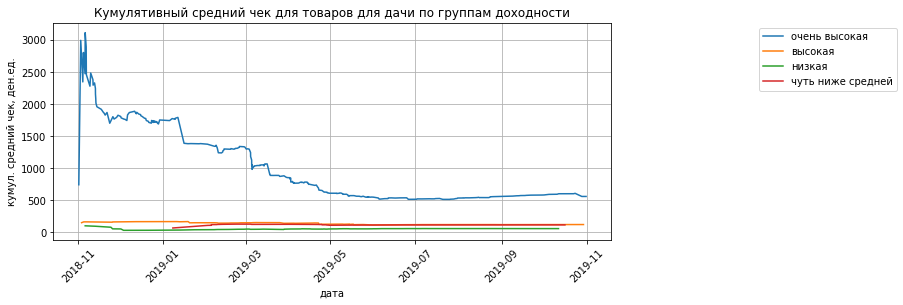

In [87]:
# Построим график
plot_dif_groups(dacha_cum, 'avg_price', 'revenue_group', 'date', 'Кумулятивный средний чек для товаров для дачи',
                'доходности', 'кумул. средний чек, ден.ед.')

В товарах для дачи очень сильно выделяется категория очень высокой доходности: средний чек в начале периода по ней показал сильный всплеск свыше 2 000 ден.ед. Остальные категории доходности имеют близкое значение среднего чека.

Чтобы увидить различия между ними, построим более укрупнённый график без учёта "выброса" в начале периода.

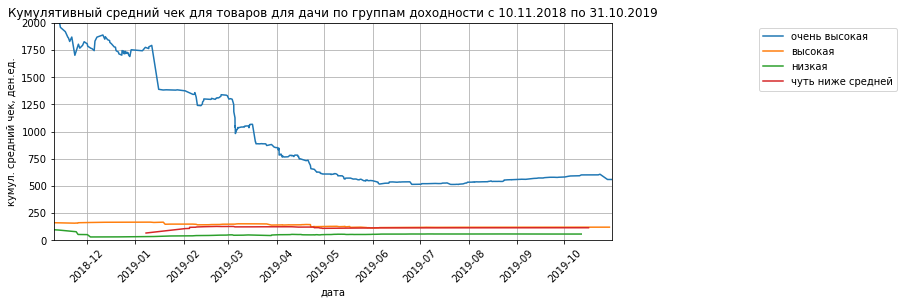

In [88]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set(title='Кумулятивный средний чек для товаров для дачи по группам доходности c 10.11.2018 по 31.10.2019', xlabel='дата',
       ylabel='кумул. средний чек, ден.ед.')
for category in dacha_cum['revenue_group'].unique():
    df_categ = dacha_cum.query('revenue_group == @category')
    ax.plot(df_categ['date'], df_categ['avg_price'], '-', label=category)
xlabels = ax.xaxis.get_ticklabels()
for label in xlabels:
    label.set_rotation(45)
ax.grid()
ax.legend(bbox_to_anchor=(1.52, 1))
ax.axis([pd.to_datetime("2018-11-10"), pd.to_datetime('2019-10-31'), 0, 2000])
plt.show()

Средний чек для высокой доходности и доходности чуть ниже средней сравнялся с мая 2019 года. Таким образом, возможно, для категории товаров для дачи достаточно 2 или 3 категорий (в зависимости от того, что покажет статистический тест). Данные следует отфильтровать от выбросов, исключив период до 10.11.2018 года.

In [89]:
dacha_cum = dacha_cum.query('date >= "2018-11-10"')

#### Товары для дома

Построим кумулятивную таблицу для категории "товары для дома", воспользовавшись введённой ранее функцией и расчитаем в ней средний чек заказа.

In [90]:
household_cum = df_cum(household_goods, 'revenue_group')
household_cum['avg_price'] = household_cum['revenue'] / household_cum['quantity']

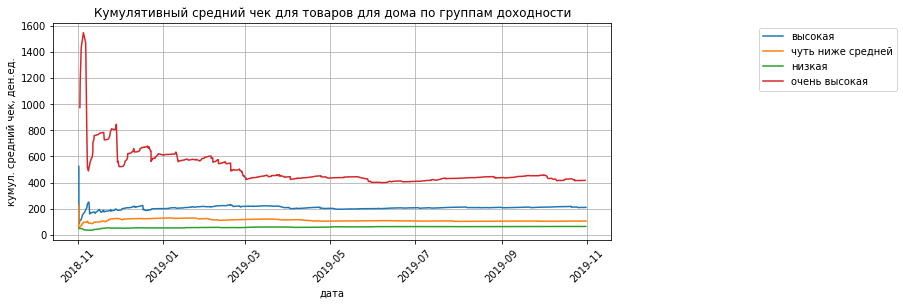

In [91]:
# Построим график
plot_dif_groups(household_cum, 'avg_price', 'revenue_group', 'date', 'Кумулятивный средний чек для товаров для дома',
                'доходности', 'кумул. средний чек, ден.ед.')

В товарах для дома также очень сильно выделяется категория очень высокой доходности: средний чек в начале периода по ней показал сильный всплеск свыше 1 500 ден.ед. Остальные категории доходности имеют близкое значение среднего чека, хотя и по ним в начале периода наблюдался "выброс".

Чтобы увидить различия между ними, построим более укрупнённый график без учёта "выброса" в начале периода.

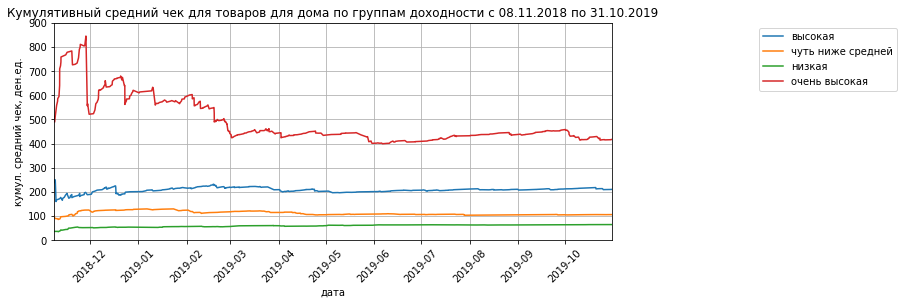

In [92]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set(title='Кумулятивный средний чек для товаров для дома по группам доходности c 08.11.2018 по 31.10.2019', xlabel='дата',
       ylabel='кумул. средний чек, ден.ед.')
for category in household_cum['revenue_group'].unique():
    df_categ = household_cum.query('revenue_group == @category')
    ax.plot(df_categ['date'], df_categ['avg_price'], '-', label=category)
xlabels = ax.xaxis.get_ticklabels()
for label in xlabels:
    label.set_rotation(45)
ax.grid()
ax.legend(bbox_to_anchor=(1.52, 1))
ax.axis([pd.to_datetime("2018-11-08"), pd.to_datetime('2019-10-31'), 0, 900])
plt.show()

Средний чек для разных категорий доходности по товарам для дома отличается, в зависимости от категории. При этом товары, приносящие очень высокую доходность значительно выше всех остальных категорий. Данные следует отфильтровать от выбросов, исключив период до 08.11.2018 года.

In [93]:
household_cum = household_cum.query('date >= "2018-11-08"')

#### Кухонные товары

Построим кумулятивную таблицу для категории "кухонные товары", воспользовавшись введённой ранее функцией и расчитаем в ней средний чек заказа.

In [94]:
kitchen_cum = df_cum(kitchen_goods, 'revenue_group')
kitchen_cum['avg_price'] = kitchen_cum['revenue'] / kitchen_cum['quantity']

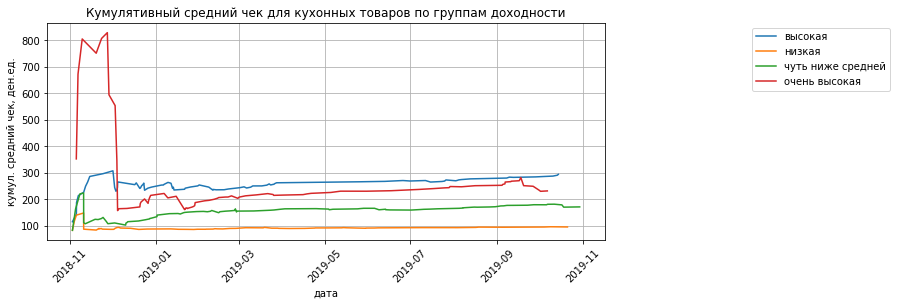

In [95]:
# Построим график
plot_dif_groups(kitchen_cum, 'avg_price', 'revenue_group', 'date', 'Кумулятивный средний чек для кухонных товаров',
                'доходности', 'кумул. средний чек, ден.ед.')

Для кухонных товаров картина очень любопытная: в начале периода был сильный всплеск для категории очень высокой доходности, а в остальные периоды - средний чек по этой категории практически сравнялся с высокой доходностью. Чтобы увидить различия между ними, построим более укрупнённый график без учёта "выброса" в начале периода.

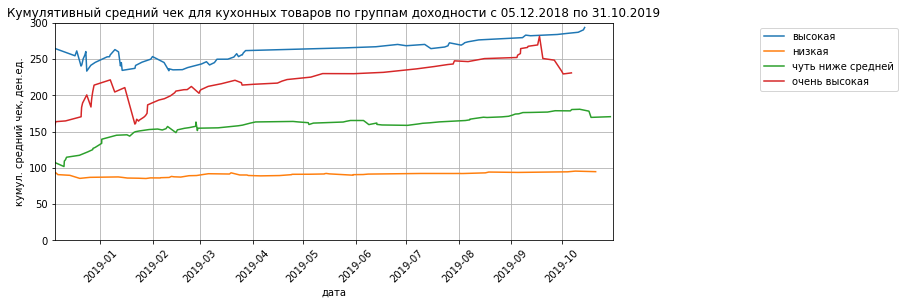

In [96]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set(title='Кумулятивный средний чек для кухонных товаров по группам доходности c 05.12.2018 по 31.10.2019', xlabel='дата',
       ylabel='кумул. средний чек, ден.ед.')
for category in kitchen_cum['revenue_group'].unique():
    df_categ = kitchen_cum.query('revenue_group == @category')
    ax.plot(df_categ['date'], df_categ['avg_price'], '-', label=category)
xlabels = ax.xaxis.get_ticklabels()
for label in xlabels:
    label.set_rotation(45)
ax.grid()
ax.legend(bbox_to_anchor=(1.52, 1))
ax.axis([pd.to_datetime("2018-12-05"), pd.to_datetime('2019-10-31'), 0, 300])
plt.show()

C 5 декабря средний чек по товарам, приносящим очень высокую доходность магазину, практически сравнялся со средним чеком товаров, приносящих высокую доходность. Возможно, статистически значимых различий между ними нет, и нам достаточно трёх подкатегорий для данной товарной группы, что покажет статистический тест. Исключим из данных период до 05.12.2008, в который наблюдался "выброс".

In [97]:
kitchen_cum = kitchen_cum.query('date >= "2018-12-05"')

#### Товары для строительства и ремонта, мебель

Построим кумулятивную таблицу для категории "товары для строительства и ремонта, мебель", воспользовавшись введённой ранее функцией и расчитаем в ней средний чек заказа.

In [98]:
furniture_cum = df_cum(furniture_goods, 'revenue_group')
furniture_cum['avg_price'] = furniture_cum['revenue'] / furniture_cum['quantity']

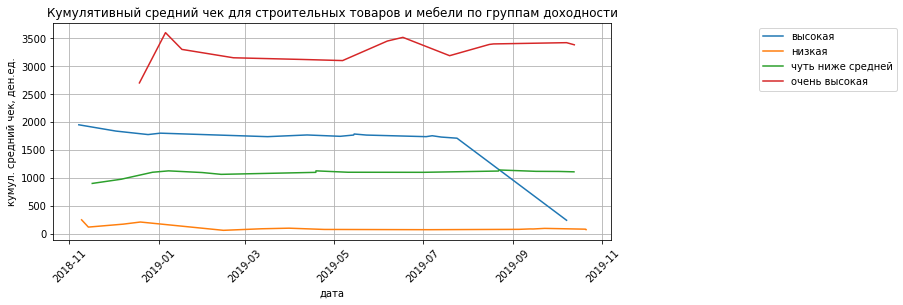

In [99]:
# Построим график
plot_dif_groups(furniture_cum, 'avg_price', 'revenue_group', 'date', 'Кумулятивный средний чек для строительных товаров и \
мебели', 'доходности', 'кумул. средний чек, ден.ед.')

В строительных товарах наблюдается очень крупная покупка для этой категории по среднему чеку (около 3 500 ден.ед.) в январе 2019 года. В целом же, различия между группами доходности отражаются на величинах среднего чека, но средний чек товаров с высокой доходностью начал падать с августа 2019 года, и в сентябре оказался меньше среднего чека для товаров с доходностью чуть ниже средней.

### Cтатистическая значимость различий между подгруппами <a id='step_3.3'></a>

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, применим критерий Манна-Уитни. И рассчитаем относительные различия между различными группами доходности в рамках каждой товарной категории.

Результат отобразим в виде таблицы.

In [100]:
def test_values(df):
    
    # где df - датасет с анализируемой товарной группой
    
    # Расчитаем p-value
    extra_high_pvalue = st.mannwhitneyu(df.query('revenue_group == "очень высокая"')['avg_price'],
                                        df.query('revenue_group == "высокая"')['avg_price'])[1]
    extra_middle_pvalue = st.mannwhitneyu(df.query('revenue_group == "очень высокая"')['avg_price'],
                                          df.query('revenue_group == "чуть ниже средней"')['avg_price'])[1]
    extra_low_pvalue = st.mannwhitneyu(df.query('revenue_group == "очень высокая"')['avg_price'],
                                       df.query('revenue_group == "низкая"')['avg_price'])[1]
    high_middle_pvalue = st.mannwhitneyu(df.query('revenue_group == "высокая"')['avg_price'],
                                         df.query('revenue_group == "чуть ниже средней"')['avg_price'])[1]
    high_low_pvalue = st.mannwhitneyu(df.query('revenue_group == "высокая"')['avg_price'],
                                      df.query('revenue_group == "низкая"')['avg_price'])[1]
    middle_low_pvalue = st.mannwhitneyu(df.query('revenue_group == "чуть ниже средней"')['avg_price'],
                                        df.query('revenue_group == "низкая"')['avg_price'])[1]
    
    # Расчитаем относительный прирост среднего чека
    extra_high_delta = (df.query('revenue_group == "очень высокая"')['avg_price'].mean() /
                        df.query('revenue_group == "высокая"')['avg_price'].mean()) - 1
    extra_middle_delta = (df.query('revenue_group == "очень высокая"')['avg_price'].mean() /
                          df.query('revenue_group == "чуть ниже средней"')['avg_price'].mean()) - 1
    extra_low_delta = (df.query('revenue_group == "очень высокая"')['avg_price'].mean() /
                       df.query('revenue_group == "низкая"')['avg_price'].mean()) - 1
    high_middle_delta = (df.query('revenue_group == "высокая"')['avg_price'].mean() /
                         df.query('revenue_group == "чуть ниже средней"')['avg_price'].mean()) - 1
    high_low_delta = (df.query('revenue_group == "высокая"')['avg_price'].mean() /
                      df.query('revenue_group == "низкая"')['avg_price'].mean()) - 1
    middle_low_delta = (df.query('revenue_group == "чуть ниже средней"')['avg_price'].mean() /
                        df.query('revenue_group == "низкая"')['avg_price'].mean()) - 1
    
    # Построение сводной таблицы с показателями попарных тестов
    test_values = pd.DataFrame({'groups_tested': ['Очень высокая и Высокая доходность', 'Очень высокая доходность и Доходность \
                                                  чуть ниже средней', 'Очень высокая и низкая доходность', 'Высокая доходность \
                                                  и Доходность чуть ниже средней', 'Высокая и Низкая доходность', 'Доходность \
                                                  чуть ниже средней и Низкая доходность'],
                                'p-value': [extra_high_pvalue, extra_middle_pvalue, extra_low_pvalue,
                                            high_middle_pvalue, high_low_pvalue, middle_low_pvalue],
                                'delta': [extra_high_delta, extra_middle_delta, extra_low_delta,
                                          high_middle_delta, high_low_delta, middle_low_delta]})
    test_values[['p-value', 'delta']] = round(test_values[['p-value', 'delta']], 5)
    test_values = test_values.set_index('groups_tested')
    return test_values

#### Cтатистическая значимость различий в среднем чеке заказа. Категория "товары для дачи"

Построим гипотезу H0: Для товаров с различной доходностью в категории "товары для дачи", попадающих в покупки клиентов, средний чек не отличается от аналогичного показателя для товаров из категории с другой доходностью. Тогда гипотеза H1: Между показателями наблюдаются существенные различия.

In [101]:
test_values(dacha_cum)

,p-value,delta
groups_tested,,
Очень высокая и Высокая доходность,0.0,5.86937
Очень высокая доходность и Доходность чуть ниже средней,0.0,6.70993
Очень высокая и низкая доходность,0.0,16.12861
Высокая доходность и Доходность чуть ниже средней,0.0,0.12236
Высокая и Низкая доходность,0.0,1.49348
Доходность чуть ниже средней и Низкая доходность,0.0,1.22163


Значение p-value для среднего чека в категории "товары для дачи" при комбинациях сравнений разных категорий доходности близко к нулю по всем категориям. А, значит, мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке категории "товары для дачи" есть различия для разных уровней доходности. Относительный прирост среднего чека группы Очень высокая доходность к показателю группы Высокая доходность составил 586,9%; группы Очень высокая доходность к показателю группы Доходность чуть ниже средней 671%; группы Очень высокая доходность к показателю группы Низкая доходность 1612,9%; группы Высокая доходность к показателю группы Доходность чуть ниже средней 12,2%; группы Высокая доходность к показателю группы Низкая доходность 149,3%; группы Доходность чуть ниже средней к показателю группы Низкая доходность 122,2%. Это значимые различия.

#### Cтатистическая значимость различий в среднем чеке заказа. Категория "товары для дома"

Построим гипотезу H0: Для товаров с различной доходностью в категории "товары для дома", попадающих в покупки клиентов, средний чек не отличается от аналогичного показателя для товаров из категории с другой доходностью. Тогда гипотеза H1: Между показателями наблюдаются существенные различия.

In [102]:
test_values(household_cum)

,p-value,delta
groups_tested,,
Очень высокая и Высокая доходность,0.0,1.36903
Очень высокая доходность и Доходность чуть ниже средней,0.0,3.39749
Очень высокая и низкая доходность,0.0,7.29921
Высокая доходность и Доходность чуть ниже средней,0.0,0.85624
Высокая и Низкая доходность,0.0,2.50321
Доходность чуть ниже средней и Низкая доходность,0.0,0.88726


Значение p-value для среднего чека в категории "товары для дома" при комбинациях сравнений разных категорий доходности близко к нулю по всем категориям. А, значит, мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке категории "товары для дома" есть различия для разных уровней доходности. Относительный прирост среднего чека группы Очень высокая доходность к показателю группы Высокая доходность составил 136,9%; группы Очень высокая доходность к показателю группы Доходность чуть ниже средней 339,7%; группы Очень высокая доходность к показателю группы Низкая доходность 730%; группы Высокая доходность к показателю группы Доходность чуть ниже средней 85,6%; группы Высокая доходность к показателю группы Низкая доходность 250,3%; группы Доходность чуть ниже средней к показателю группы Низкая доходность 88,7%. Это значимые различия.

#### Cтатистическая значимость различий в среднем чеке заказа. Категория "кухонные товары"

Построим гипотезу H0: Для товаров с различной доходностью в категории "кухонные товары", попадающих в покупки клиентов, средний чек не отличается от аналогичного показателя для товаров из категории с другой доходностью. Тогда гипотеза H1: Между показателями наблюдаются существенные различия.

In [103]:
test_values(kitchen_cum)

,p-value,delta
groups_tested,,
Очень высокая и Высокая доходность,0.0,-0.17047
Очень высокая доходность и Доходность чуть ниже средней,0.0,0.36377
Очень высокая и низкая доходность,0.0,1.36899
Высокая доходность и Доходность чуть ниже средней,0.0,0.64404
Высокая и Низкая доходность,0.0,1.85583
Доходность чуть ниже средней и Низкая доходность,0.0,0.73708


Значение p-value для среднего чека в категории "кухонные товары" при комбинациях сравнений разных категорий доходности близко к нулю по всем категориям. А, значит, мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке категории "товары для дома" есть различия для разных уровней доходности. Относительный прирост среднего чека группы Очень высокая доходность к показателю группы Высокая доходность составил -17% (то есть в какие-то моменты товары с Высокой доходностью по среднему чеку были выше); группы Очень высокая доходность к показателю группы Доходность чуть ниже средней 36,4%; группы Очень высокая доходность к показателю группы Низкая доходность 136,9%; группы Высокая доходность к показателю группы Доходность чуть ниже средней 64,4%; группы Высокая доходность к показателю группы Низкая доходность 185,6%; группы Доходность чуть ниже средней к показателю группы Низкая доходность 73,7%. Это значимые различия по всем показателям, кроме первого.

Поскольку выглядит странно, что относительный прирост показателя Очень высокой доходности оказался ниже показателя Высокой доходности, это может говорить о ложно-отрицательном результате; было принято решение объединить группы с высокой и очень высокой доходностью по категории "кухонные товары".

#### Cтатистическая значимость различий в среднем чеке заказа. Категория "товары для строительства и ремонта, мебель"

Построим гипотезу H0: Для товаров с различной доходностью в категории "товары для строительства и ремонта, мебель", попадающих в покупки клиентов, средний чек не отличается от аналогичного показателя для товаров из категории с другой доходностью. Тогда гипотеза H1: Между показателями наблюдаются существенные различия.

In [104]:
test_values(furniture_cum)

,p-value,delta
groups_tested,,
Очень высокая и Высокая доходность,0.00000,0.95692
Очень высокая доходность и Доходность чуть ниже средней,0.00000,2.02897
Очень высокая и низкая доходность,0.00000,29.94229
Высокая доходность и Доходность чуть ниже средней,0.00002,0.54783
Высокая и Низкая доходность,0.00000,14.81171
Доходность чуть ниже средней и Низкая доходность,0.00000,9.21543


Значение p-value для среднего чека в категории "Товары для строительства и ремонта, мебель" при комбинациях сравнений разных категорий доходности близко к нулю по всем категориям. А, значит, мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке категории "Товары для строительства и ремонта, мебель" есть различия для разных уровней доходности. Относительный прирост среднего чека группы Очень высокая доходность к показателю группы Высокая доходность составил 95,7%; группы Очень высокая доходность к показателю группы Доходность чуть ниже средней 202,9%; группы Очень высокая доходность к показателю группы Низкая доходность 2994,2%; группы Высокая доходность к показателю группы Доходность чуть ниже средней 54,8%; группы Высокая доходность к показателю группы Низкая доходность 1481,2%; группы Доходность чуть ниже средней к показателю группы Низкая доходность 921,5%. Это значимые различия.

### Вывод <a id='step_3.4'></a>

В каждом из выделенных товарных сегментов нами были разбиты товары по доходности, которую они приносят интернет-магазину. **В каждом сегменте товары были поделены на 4 категории**: низкая, чуть ниже средней, высокая, очень высокая доходность. Были определены интервалы в рамках товарных групп по выручке, которую приносит покупка товара.

**Интервалы доходности для категории "товары для дачи"**:

    - менее 105 ден.ед. - категория "низкая доходность";
    - от 105 до 135 ден.ед. - категория "чуть ниже средней доходности";
    - от 135 до 228 ден.ед. - категория "высокая доходность";
    - более 228 ден.ед. - категория "очень высокая доходность".
    
Наибольшее число заказов в этой категории (457 заказов) и наибольшее число клиентов (441 покупатель) приносят магазину очень высокую доходность. Среднее количество (226 заказов и 210 клиентов) приносят доходность чуть ниже средней, а также примерно столько же (205 заказов и 194 клиента) - высокую доходность. В товарной категории мало заказов (167 заказов) и клиентов (161 покупатель), которые приносят магазину низкую доходность.

**Интервалы доходности для категории "товары для дома"**:

    - менее 142 ден.ед. - категория "низкая доходность";
    - от 142 до 314 ден.ед. - категория "чуть ниже средней доходности";
    - от 314 до 828 ден.ед. - категория "высокая доходность";
    - более 828 ден.ед. - категория "очень высокая доходность".

Наибольшее число заказов в этой категории (365 заказов) и наибольшее число клиентов (357 покупателей) приносят магазину очень высокую доходность; чуть меньшее число (343 заказа и 340 клиентов) - высокую доходность. Среднее количество (309 заказов и 300 клиентов) приносят доходность чуть ниже средней. В товарной категории мало заказов (259 заказов) и клиентов (254 покупателя), которые приносят магазину низкую доходность.

**Интервалы доходности для категории "кухонные товары"**:

    - менее 194 ден.ед. - категория "низкая доходность";
    - от 194 до 487 ден.ед. - категория "чуть ниже средней доходности";
    - от 487 до 974 ден.ед. - категория "высокая доходность";
    - более 974 ден.ед. - категория "очень высокая доходность".
    
Примерно одинаковое число заказов (78-79 заказов) и клиентов (77-78 покупателей) в этой категории приносят магазину очень высокую или высокую доходность; чуть меньшее число (73 заказа и 72 клиента) - доходность чуть ниже средней. В товарной категории мало заказов (66 заказов) и клиентов (66 покупателей), которые приносят магазину низкую доходность.

**Интервалы доходности для категории "товары для строительства и ремонта, мебель"**:

    - менее 779 ден.ед. - категория "низкая доходность";
    - от 779 до 1 349 ден.ед. - категория "чуть ниже средней доходности";
    - от 1 349 до 1 949 ден.ед. - категория "высокая доходность";
    - более 1 949 ден.ед. - категория "очень высокая доходность".

Примерно равное число заказов (27-30) и клиентов (26-29) в этой категории приносят магазину очень высокую, чуть ниже средней и низкую доходность. В товарной категории мало заказов (19 заказов) и клиентов (19 покупателей), которые приносят магазину высокую доходность.

Далее нами был проанализирован **показатель кумулятивного среднего чека для каждой категории доходности внутри товарных групп**. *В товарах для дачи* очень сильно выделяется категория очень высокой доходности: средний чек в начале периода по ней показал сильный всплеск свыше 2 000 ден.ед. Остальные категории доходности имеют близкое значение среднего чека. Средний чек для высокой доходности и доходности чуть ниже средней сравнялся с мая 2019 года. Таким образом, возможно, для категории товаров для дачи достаточно 2 или 3 категорий (но статистический тест показал, что все 4 категории оправданы). *В товарах для дома* также очень сильно выделяется категория очень высокой доходности: средний чек в начале периода по ней показал сильный всплеск свыше 1 500 ден.ед. Остальные категории доходности имеют близкое значение среднего чека, хотя и по ним в начале периода наблюдался "выброс". Средний чек для разных категорий доходности по товарам для дома отличается, в зависимости от категории. При этом товары, приносящие очень высокую доходность значительно выше всех остальных категорий. *Для кухонных товаров* картина очень любопытная: в начале периода был сильный всплеск для категории очень высокой доходности, а в остальные периоды - средний чек по этой категории практически сравнялся с высокой доходностью. C 5 декабря 2018 года средний чек по товарам, приносящим очень высокую доходность магазину, практически сравнялся со средним чеком товаров, приносящих высокую доходность. Возможно, статистически значимых различий между ними нет, и нам достаточно трёх подкатегорий для данной товарной группы (в дальнейшем статистический тест подтвердил данное предположение). *В строительных товарах* наблюдается очень крупная покупка для этой категории по среднему чеку (около 3 500 ден.ед.) в январе 2019 года. В целом же, различия между группами доходности отражаются на величинах среднего чека, но средний чек товаров с высокой доходностью начал падать с августа 2019 года, и в сентябре оказался меньше среднего чека для товаров с доходностью чуть ниже средней.

Чтобы рассчитать **статистическую значимость различий в среднем чеке между сегментами в пределах товарных групп**, нами был применён критерий Манна-Уитни, а также рассчитаны относительные различия между группами доходности. *Для среднего чека по категории "товары для дачи"* были получены следующие результаты. Значение p-value для среднего чека в категории "товары для дачи" при комбинациях сравнений разных категорий доходности близко к нулю по всем категориям. А, значит, мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке категории "товары для дачи" есть различия для разных уровней доходности. Относительный прирост среднего чека группы Очень высокая доходность к показателю группы Высокая доходность составил 586,9%; группы Очень высокая доходность к показателю группы Доходность чуть ниже средней 671%; группы Очень высокая доходность к показателю группы Низкая доходность 1612,9%; группы Высокая доходность к показателю группы Доходность чуть ниже средней 12,2%; группы Высокая доходность к показателю группы Низкая доходность 149,3%; группы Доходность чуть ниже средней к показателю группы Низкая доходность 122,2%. Это значимые различия.

*Для среднего чека по категории "товары для дома"* были получены следующие результаты. Значение p-value для среднего чека в категории "товары для дома" при комбинациях сравнений разных категорий доходности близко к нулю по всем категориям. А, значит, мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке категории "товары для дома" есть различия для разных уровней доходности. Относительный прирост среднего чека группы Очень высокая доходность к показателю группы Высокая доходность составил 136,9%; группы Очень высокая доходность к показателю группы Доходность чуть ниже средней 339,7%; группы Очень высокая доходность к показателю группы Низкая доходность 730%; группы Высокая доходность к показателю группы Доходность чуть ниже средней 85,6%; группы Высокая доходность к показателю группы Низкая доходность 250,3%; группы Доходность чуть ниже средней к показателю группы Низкая доходность 88,7%. Это значимые различия.

*Для среднего чека по категории "кухонные товары"* были получены следующие результаты. Значение p-value для среднего чека в категории "кухонные товары" при комбинациях сравнений разных категорий доходности близко к нулю по всем категориям. А, значит, мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке категории "товары для дома" есть различия для разных уровней доходности. Относительный прирост среднего чека группы Очень высокая доходность к показателю группы Высокая доходность составил -17% (то есть в какие-то моменты товары с Высокой доходностью по среднему чеку были выше); группы Очень высокая доходность к показателю группы Доходность чуть ниже средней 36,4%; группы Очень высокая доходность к показателю группы Низкая доходность 136,9%; группы Высокая доходность к показателю группы Доходность чуть ниже средней 64,4%; группы Высокая доходность к показателю группы Низкая доходность 185,6%; группы Доходность чуть ниже средней к показателю группы Низкая доходность 73,7%. Это значимые различия по всем показателям, кроме первого. Поскольку выглядит странно, что относительный прирост показателя Очень высокой доходности оказался ниже показателя Высокой доходности, это может говорить о ложно-отрицательном результате; **было принято решение объединить группы с высокой и очень высокой доходностью по категории "кухонные товары"**. То есть **новые интервалы доходности для категории "кухонные товары"**:

    - менее 194 ден.ед. - категория "низкая доходность";
    - от 194 до 487 ден.ед. - категория "чуть ниже средней доходности";
    - более 487 ден.ед. - категория "высокая доходность".

*Для среднего чека по категории "товары для строительства и ремонта, мебель"* были получены следующие результаты. Значение p-value для среднего чека в категории "Товары для строительства и ремонта, мебель" при комбинациях сравнений разных категорий доходности близко к нулю по всем категориям. А, значит, мы можем отвергнуть нулевую гипотезу и считать, что в среднем чеке категории "Товары для строительства и ремонта, мебель" есть различия для разных уровней доходности. Относительный прирост среднего чека группы Очень высокая доходность к показателю группы Высокая доходность составил 95,7%; группы Очень высокая доходность к показателю группы Доходность чуть ниже средней 202,9%; группы Очень высокая доходность к показателю группы Низкая доходность 2994,2%; группы Высокая доходность к показателю группы Доходность чуть ниже средней 54,8%; группы Высокая доходность к показателю группы Низкая доходность 1481,2%; группы Доходность чуть ниже средней к показателю группы Низкая доходность 921,5%. Это значимые различия.

## Общий вывод <a id='step_4'></a>

Нами были проанализированы **данные о 6 737 транзакциях в интернет-магазине товаров для дома и быта «Пока все ещё тут»** с информацией о дате заказа, идентификаторах покупателей и заказов, наименованиях купленных товаров, количестве товара в заказе и его цене. Данные предоставлены **за период с 1 октября 2018 года по 31 октября 2019 года**, то есть за год и один месяц. В течение указанного периода **покупки в интернет-магазине производил 2 451 клиент**. При этом **было осуществлено 2 784 заказа**. В один заказ могли попасть разные товары. Кроме того, один пользователь мог сделать несколько заказов за анализируемый период. **Было продано 2 343 разных товара** (некоторые не в одном экземпляре). При этом наблюдаем абсолютную **разнородность товаров**: есть и семена, есть бытовые приспособления, есть и мебельные товары, и другие категории.

Анализ данных позволил сделать **следующие выводы**.

1. Разброс по ценам товаров достаточно большой (стандартное отклонение около 870 ден.ед.), и есть "всплески" (максимум составляет 14 917 ден.ед.). При этом большинство клиентов покупает товар в пределах до 400 ден.ед. (минимальная стоимость равна 9 ден.ед., первый квартиль - 101 ден.ед., медиана составляет 135 ден.ед., а третий квартиль - 404 ден.ед.). Средняя стоимость единицы купленного товара отличается от медианной, что связано с "всплесками" ("выбросами"), и составляет около 460 ден.ед. Отметим, что основное число покупок приходится на цену товара до определённого значения. Свыше него имеются отдельные "выбросы".

То есть **очень дорогой товар покупают не так часто и не так много, как дешёвый**.

2. Разброс по выручке за проданный товар тоже достаточно большой (стандартное отклонение составило около 1 355 ден.ед.), и есть "всплески" (максимум составляет 47 385 ден.ед.). При этом большинство клиентов тратит на покупку до 600 ден.ед. (минимальная стоимость покупки равна 9 ден.ед., первый квартиль - 120 ден.ед., медиана составляет 157 ден.ед., а третий квартиль - 599 ден.ед.). Средняя стоимость покупки отличается от медианной, что связано с "всплесками" ("выбросами"), и составляет около 604 ден.ед.

То есть **профиль потребителя следует составлять не только, исходя из категории товара, но и из выручки** (доходности, которую покупка товара приносит интернет-магазину).

3. Существет **4 основных товарных групп**:
    * товары для дачи: это рассада, уличные урны, черенки, тележки, семена и т.д.;
    * товары для дома: это комнатные растения, гладильные доски, вешалки, ванные принадлежности, полотенца и т.д.;
    * кухонные товары: это посуда, губки, скатерти;
    * товары для строительства и ремонта, мебель: это полки, фурнитурные принадлежности, стремянки.
    
4. По кумулятивной выручке **самым прибыльным направлением для бизнеса являются товары для дома, чуть меньшую доходность имеют товары для дачи**. Отличие между этими категориями заключается в том, что продажа товаров для дачи имеет сезонный характер (с мая доходность этой категории приблизилась к доходности категории товары для дома). Меньшей доходностью обладают две другие категории: чуть более прибыльны кухонные товары; и самым недоходным направлением по кумулятивной выручке являются товары для строительства и ремонта, мебель.

5. Анализ кумулятивного среднего чека показал, что в октябре 2018 года наблюдалась очень крупная по стоимости покупка в категории **товаров для строительства и ремонта, мебели**. В целом, данная категория **с апреля 2019 года превосходила по среднему чеку другие категории**. **Товары для дачи по кумулятивному среднему чеку предвосходили другие категории до мая 2019 года**, что может быть связано с сезонностью: падение числа купленных товаров в категории при относительной неизменности их цен - соответственно, цена каждого купленного товара относительно выше. С мая 2019 года средний чек товаров для дома и кухонных товаров практически не менялся на протяжении всего периода: товары для дома, в среднем, стоили дороже, чем товары для кухни. Товары для строительства по кумулятивному среднему чеку с ноября 2018 по декабрь 2018 года установился на уровне кухонных товаров, потом начал расти, и достиг пикового значения в августе-сентябре 2019 года, затем начал снижаться с сентября 2019 года. Товары для дачи показывали очень высокий средний чек (около 800 ден.ед.) до марта 2019 года, затем снизился и установился на уровне 200-300 ден.ед. с июня 2019 года.

6. Анализ распределения покупателей показал, что большинство покупателей делали заказы в интернет-магазине до 10 раз. Однако у нас есть пользователи, которые покупали товары для дома более 70 раз, и товары для дачи более 20 раз. Для определения границы, отсекающей аномальных пользователей, были посчитаны 90-й, 95-й и 99-й перцентили количества заказов на пользователя: не более 1% пользователей оформляли 3 и более заказов; не более 5% - 2 и более заказов; 10% пользователей заказывали более 1 раза.

Таким образом, **свыше 3 заказов - это нижняя граница аномального числа заказов**.

7. Анализ распределения выручки по заказам показал, что имеется несколько аномально дорогих заказа (свыше 7 500 - 10 000 ден.ед.). На основе 90-го, 95-го и 99-го перцентилей были посчитаны границы аномальных значений: не более 1% заказов дороже 7 926 ден.ед.; не более 5% - дороже 3 852 ден.ед. И 10% заказов было совершено на сумму свыше 2 699 ден.ед.

Таким образом, **свыше 8 000 ден.ед. - это нижняя граница аномальной стоимости заказов**. В целом, **количество клиентов, которое было по этим критериям отнесено к аномальным, составило всего 27 человек**.

8. В каждом из выделенных товарных сегментов нами были разбиты товары по доходности, которую они приносят интернет-магазину. В каждом сегменте **товары были поделены на 4 категории: низкая, чуть ниже средней, высокая, очень высокая доходность**. Были определены интервалы в рамках товарных групп по выручке, которую приносит покупка товара.

*Интервалы доходности для категории "товары для дачи"*:
- менее 105 ден.ед. - категория "низкая доходность";
- от 105 до 135 ден.ед. - категория "чуть ниже средней доходности";
- от 135 до 228 ден.ед. - категория "высокая доходность";
- более 228 ден.ед. - категория "очень высокая доходность".

Наибольшее число заказов в этой категории (457 заказов) и наибольшее число клиентов (441 покупатель) приносят магазину очень высокую доходность. Среднее количество (226 заказов и 210 клиентов) приносят доходность чуть ниже средней, а также примерно столько же (205 заказов и 194 клиента) - высокую доходность. В товарной категории мало заказов (167 заказов) и клиентов (161 покупатель), которые приносят магазину низкую доходность.

*Интервалы доходности для категории "товары для дома"*:
- менее 142 ден.ед. - категория "низкая доходность";
- от 142 до 314 ден.ед. - категория "чуть ниже средней доходности";
- от 314 до 828 ден.ед. - категория "высокая доходность";
- более 828 ден.ед. - категория "очень высокая доходность".

Наибольшее число заказов в этой категории (365 заказов) и наибольшее число клиентов (357 покупателей) приносят магазину очень высокую доходность; чуть меньшее число (343 заказа и 340 клиентов) - высокую доходность. Среднее количество (309 заказов и 300 клиентов) приносят доходность чуть ниже средней. В товарной категории мало заказов (259 заказов) и клиентов (254 покупателя), которые приносят магазину низкую доходность.

*Интервалы доходности для категории "кухонные товары"*:
- менее 194 ден.ед. - категория "низкая доходность";
- от 194 до 487 ден.ед. - категория "чуть ниже средней доходности";
- более 487 ден.ед. - категория "высокая доходность".

Наибольшее число заказов (157 заказов) и клиентов (155 покупателей) в этой категории приносят магазину высокую доходность; меньшее число (73 заказа и 72 клиента) - доходность чуть ниже средней. В товарной категории мало заказов (66 заказов) и клиентов (66 покупателей), которые приносят магазину низкую доходность.

*Интервалы доходности для категории "товары для строительства и ремонта, мебель"*:
- менее 779 ден.ед. - категория "низкая доходность";
- от 779 до 1 349 ден.ед. - категория "чуть ниже средней доходности";
- от 1 349 до 1 949 ден.ед. - категория "высокая доходность";
- более 1 949 ден.ед. - категория "очень высокая доходность".

Примерно равное число заказов (27-30) и клиентов (26-29) в этой категории приносят магазину очень высокую, чуть ниже средней и низкую доходность. В товарной категории мало заказов (19 заказов) и клиентов (19 покупателей), которые приносят магазину высокую доходность.

9. **Анализ показателя кумулятивного чека** для каждой категории доходности внутри товарных групп показал **следующие результаты**. *В товарах для дачи* очень сильно выделяется категория очень высокой доходности: средний чек в начале периода по ней показал сильный всплеск свыше 2 000 ден.ед. Остальные категории доходности имеют близкое значение среднего чека. Средний чек для высокой доходности и доходности чуть ниже средней сравнялся с мая 2019 года. В товарах для дома также очень сильно выделяется категория очень высокой доходности: средний чек в начале периода по ней показал сильный всплеск свыше 1 500 ден.ед. Остальные категории доходности имеют близкое значение среднего чека, хотя и по ним в начале периода наблюдался "выброс". Средний чек для разных категорий доходности по *товарам для дома* отличается, в зависимости от категории. При этом товары, приносящие очень высокую доходность значительно выше всех остальных категорий. *Для кухонных товаров* картина очень любопытная: в начале периода был сильный всплеск для категории очень высокой доходности, а в остальные периоды - средний чек по этой категории практически сравнялся с высокой доходностью. C 5 декабря 2018 года средний чек по товарам, приносящим очень высокую доходность магазину, практически сравнялся со средним чеком товаров, приносящих высокую доходность. Поскольку статистически значимых различий между ними не было, было принято решение оставить три подкатегории для данной товарной группы. *В строительных товарах* наблюдается очень крупная покупка для этой категории по среднему чеку (около 3 500 ден.ед.) в январе 2019 года. В целом же, различия между группами доходности отражаются на величинах среднего чека, но средний чек товаров с высокой доходностью начал падать с августа 2019 года, и в сентябре оказался меньше среднего чека для товаров с доходностью чуть ниже средней.

## Рекомендации <a id='step_5'></a>

На основе анализа пользовательского опыта и сегментации потребителей, были предложены следующие **рекомендации по персонализации предложений для покупателей**:

1. В рамках категорий покупаемых товаров периодически рекомендовать покупателю товар, имеющий высокую и очень высокую доходность для магазина.
2. Исходя из платёжеспособности покупателя (если он не интересуется дорогими товарами), предлагать ему товары с меньшей доходностью к товарам, которые он покупает, в рамках той же категории.
3. Акцентировать внимание на потребителях, покупающих товары для дома, как на самом доходном сегменте для бизнеса (возможно, проводить для них какие-то промо-акции и другие маркетинговые мероприятия, привлекая больше клиентов в данный сегмент).
4. Акцентировать внимание на потребителях, покупающий товары для дачи, в "сезон" (в период с мая по октябрь).
5. Если это возможно, снизить цены на товары в категории "товары для строительства и ремонта, мебель" - чтобы привлечь большее число клиентов в этот сегмент, и тем самым, возможно, увеличить его доходность.
6. Обратить внимание на "аномальных" клиентов (свыше 3 покупок суммой более 8 000 ден.ед.): возможно, это оптовые покупатели, которым следует предложить не только персональные предложения, но и оптовые скидки.